# Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import shapiro, norm
from sklearn.metrics import r2_score
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.diagnostic import het_breuschpagan
import re
from itertools import chain, product
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import LeaveOneOut
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import RandomizedSearchCV


import statsmodels.stats as sms
import statsmodels.stats.api as sm
from statsmodels.api import qqplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,roc_auc_score,roc_curve
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from math import sqrt


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
#import lightgbm as lgb
import pickle

from sklearn.preprocessing import StandardScaler

## Read Data

In [111]:
data=pd.read_csv("final_kentron_sale.csv",encoding="latin_1")

In [112]:
data.head()

Unnamed: 0  Air_conditioner  Balcony  Central_Heating  Close_bus_station  \
0           0                0        0                0                  1   
1           1                1        0                0                  1   
2           2                1        0                1                  0   
3           3                0        0                0                  1   
4           4                1        0                1                  1   

   Electricity  Equipment  Euro_windows  Furniture  Gas  ...  Metro  \
0            1          1             1          1    1  ...   3082   
1            1          1             1          1    1  ...    544   
2            1          1             0          1    1  ...    568   
3            1          0             1          0    1  ...    483   
4            1          0             1          1    1  ...   1511   

   Nightclub   Pub Restaurants  School  Secondary_highway  Supermarket  \
0       3809  2727         390     114                505          400   
1        309   151          35      58                248           78   
2        341   316          54     453                 39          186   
3       1348  2084         169     346                317           81   
4       1850  1745         398     732                612          246   

   University  Republick_square  Opera_house  
0        2320       5524.202772  4727.800809  
1         451        318.650969   866.417523  
2         406        851.817719  1047.418623  
3         388       3080.457397  2465.234661  
4        1707       3510.044212  2690.342808  

[5 rows x 67 columns]

In [113]:
data.shape

(5449, 67)

## Preparing Data

In [114]:
data = data[data.city=="Yerevan"] # taking only Yerevan as there are a few ones from other cities

In [115]:
data.district.value_counts()

Center       2536
Arabkir      1415
Davtashen     323
Nor           308
Achapnyak     228
Qanaqer       215
Avan          162
Shengavit      87
Malatia        87
Erebuni        59
Norq           16
Vahagni         1
Name: district, dtype: int64

In [116]:
data.columns

Index(['Unnamed: 0', 'Air_conditioner', 'Balcony', 'Central_Heating',
       'Close_bus_station', 'Electricity', 'Equipment', 'Euro_windows',
       'Furniture', 'Gas', 'Heated_Floor', 'Heating', 'Hot_water', 'Id',
       'Internet', 'Irrigation', 'Laminate_flooring', 'Open_balcony',
       'Parking', 'Parquet', 'Playground', 'Security_system', 'Sewerage',
       'Standing_water', 'Sunny', 'Swimming_pool', 'Tile', 'View', 'Water',
       'area', 'bathrooms', 'building_type', 'city', 'condition', 'date',
       'district', 'floor', 'height', 'info', 'latitude', 'longitude',
       'new_construction', 'price', 'rooms', 'sold', 'street', 'views',
       'building_floors', 'Hospital', 'Primary_highway', 'ATM', 'Bank', 'Bar',
       'Bus_stop', 'Café', 'College', 'kindergarden', 'Metro', 'Nightclub',
       'Pub', 'Restaurants', 'School', 'Secondary_highway', 'Supermarket',
       'University', 'Republick_square', 'Opera_house'],
      dtype='object')

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5437 entries, 0 to 5448
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5437 non-null   int64  
 1   Air_conditioner    5437 non-null   int64  
 2   Balcony            5437 non-null   int64  
 3   Central_Heating    5437 non-null   int64  
 4   Close_bus_station  5437 non-null   int64  
 5   Electricity        5437 non-null   int64  
 6   Equipment          5437 non-null   int64  
 7   Euro_windows       5437 non-null   int64  
 8   Furniture          5437 non-null   int64  
 9   Gas                5437 non-null   int64  
 10  Heated_Floor       5437 non-null   int64  
 11  Heating            5437 non-null   int64  
 12  Hot_water          5437 non-null   int64  
 13  Id                 5437 non-null   object 
 14  Internet           5437 non-null   int64  
 15  Irrigation         5437 non-null   int64  
 16  Laminate_flooring  5437 

In [118]:
categoricals=['Air_conditioner', 'Central_Heating', 'Close_bus_station',
       'Electricity', 'Equipment', 'Euro_windows', 'Furniture', 'Gas',
       'Heated_Floor', 'Heating', 'Hot_water','Internet', 'Irrigation',
       'Laminate_flooring', 'Open_balcony', 'Parking', 'Parquet', 'Playground',
       'Security_system', 'Sewerage', 'Standing_water', 'Sunny','View',
       'Swimming_pool', 'Tile', 'Water','new_construction','sold']

In [119]:
for i in categoricals:
    data[i]=data[i].astype("category")

In [120]:
data.date=pd.to_datetime(data.date,dayfirst=True)

In [121]:
data=data.sort_values(by='date')

In [122]:
data.head()

Unnamed: 0 Air_conditioner  Balcony Central_Heating Close_bus_station  \
543         543               0        0               0                 0   
542         542               1        0               0                 1   
541         541               1        0               0                 1   
540         540               1        1               0                 1   
539         539               1        0               0                 1   

    Electricity Equipment Euro_windows Furniture Gas  ... Metro Nightclub  \
543           1         0            0         0   1  ...   168        32   
542           1         1            1         1   1  ...   428       299   
541           1         1            1         1   1  ...   347      1353   
540           1         1            1         1   1  ...  1036       261   
539           1         0            1         0   1  ...   137        29   

      Pub Restaurants School Secondary_highway Supermarket University  \
543   783         150    122               749          80        114   
542   183          28    346               229         108        593   
541  2065         126    214               294         111        197   
540   247          32    147                99         249         43   
539    29          26    323                23         260        670   

    Republick_square  Opera_house  
543      1770.255104  1167.117465  
542       514.127778   426.059282  
541      3058.825854  2493.866065  
540       776.022775   888.108182  
539       369.771032   715.101936  

[5 rows x 67 columns]

In [123]:
data.columns

Index(['Unnamed: 0', 'Air_conditioner', 'Balcony', 'Central_Heating',
       'Close_bus_station', 'Electricity', 'Equipment', 'Euro_windows',
       'Furniture', 'Gas', 'Heated_Floor', 'Heating', 'Hot_water', 'Id',
       'Internet', 'Irrigation', 'Laminate_flooring', 'Open_balcony',
       'Parking', 'Parquet', 'Playground', 'Security_system', 'Sewerage',
       'Standing_water', 'Sunny', 'Swimming_pool', 'Tile', 'View', 'Water',
       'area', 'bathrooms', 'building_type', 'city', 'condition', 'date',
       'district', 'floor', 'height', 'info', 'latitude', 'longitude',
       'new_construction', 'price', 'rooms', 'sold', 'street', 'views',
       'building_floors', 'Hospital', 'Primary_highway', 'ATM', 'Bank', 'Bar',
       'Bus_stop', 'Café', 'College', 'kindergarden', 'Metro', 'Nightclub',
       'Pub', 'Restaurants', 'School', 'Secondary_highway', 'Supermarket',
       'University', 'Republick_square', 'Opera_house'],
      dtype='object')

#### Droping unnessary columns

In [124]:
data.drop(["Unnamed: 0","city","Balcony","info","Id","date","Electricity","ATM","views"],axis=1,inplace=True) 

In [125]:
e=[]
for i in data.street:
    #i=re.findall("^\[([^\]]+)\]",i)
    i=re.findall("[a-zA-Z]+", i)
    e.append(i)
e  

[['Baghramyan', 'Ave', 'Kentron'],
 ['Northern', 'Hyusisayin', 'Ave'],
 ['Komitas', 'Ave'],
 ['Amiryan', 'St'],
 ['Nalbandyan', 'St'],
 ['Abovyan', 'St'],
 ['Davtashen', 'district'],
 ['Sayat', 'Nova', 'Ave'],
 ['Moskovyan', 'St'],
 ['Kajaznuni', 'St'],
 ['Saryan', 'St'],
 ['Komitas', 'Ave'],
 ['Komitas', 'Ave'],
 ['Amiryan', 'St'],
 ['Mashtots', 'Ave'],
 ['Davtashen', 'St'],
 ['Sasna', 'Tsrer', 'St'],
 ['Mamikoniants'],
 ['Aram', 'St'],
 ['Tumanyan', 'St'],
 ['Vardanants', 'St'],
 ['Aram', 'St'],
 ['Mashtots', 'Ave'],
 ['Heratsi', 'St'],
 ['Aygedzor', 'St'],
 ['Vardanants', 'St'],
 ['A', 'Avetisyan', 'St'],
 ['Nalbandyan', 'St'],
 ['Tsitsernakaberd', 'Highway'],
 ['Pushkin', 'St'],
 ['Antarayin', 'St'],
 ['Antarayin', 'St'],
 ['Charents', 'St'],
 ['Ghazar', 'Parpetsi', 'St'],
 ['Antarayin', 'St'],
 ['Abovyan', 'St'],
 ['Tsitsernakaberd', 'Highway'],
 ['Aghayan', 'St'],
 ['Sayat', 'Nova', 'Ave'],
 ['Davtashen', 'district'],
 ['Sayat', 'Nova', 'Ave'],
 ['Davtashen', 'district'],
 ['Vard

In [126]:
z=[]
for i in e:
    try:
        if len(i[0])>=3 and len(i[1])>6:
            i=str(i[0]) + "_" + str(i[1])
        elif len(i[0])>=3 and len(i[1])<6:
            i=i[0]
        elif len(i[0]<3) and len(i[1])>3:
            i=i[1]
        else:
            i=i[0]
    except:
        i=i
    z.append(i)

In [127]:
g=[]
for i in z:
    if type(i)==list and len(i)>1:
        i=str(i[0]) + "_" + str(i[1])
    elif type(i)==list and len(i)==1:
        i=i[0]
    elif type(i)==list and len(i)==0:
        i="Other"
    else:
        i=i
    g.append(i)

In [128]:
data.street=g

In [129]:
street_names=data.street.value_counts()[:80].keys().tolist() # most 50 frequent streets

In [130]:
street_names

['Komitas',
 'Davtashen_district',
 'Mashtots',
 'Antarayin',
 'Argishti',
 'Sayat',
 'Tigran',
 'Amiryan',
 'Charents',
 'Adonts',
 'Vardanants',
 'Abovyan',
 'Buzand',
 'Aram',
 'Pushkin',
 'Baghramyan',
 'Tumanyan',
 'Mamikoniants',
 'Saryan',
 'Y_Kochar',
 'Tsarav_Aghbyur',
 'A_Khachatrian',
 'Hanrapetutyan',
 'Kievyan',
 'Koghbatsi',
 'Paronyan',
 'M_Khorenatsi',
 'Azatutyan',
 'Nalbandyan',
 'A',
 'Mikoyan',
 'Davtashen',
 'Moldovakan',
 'N_Zaryan',
 'Kajaznuni',
 'V_Papazyan',
 'Sasna',
 'Gyulbenkyan',
 'Arshakunyats',
 'Yekmalyan',
 'Leningradyan',
 'Lvovyan',
 'Northern_Hyusisayin',
 'Teryan',
 'Sundukyan',
 'Hr_Kochar',
 'Gyurjyan',
 'NarDos',
 'A_Avetisyan',
 'Zakyan',
 'Moskovyan',
 'Arabkir',
 'Tsitsernakaberd_Highway',
 'V',
 'Sevak',
 'Avan',
 'Margaryan',
 'Aghbyur',
 'Droi',
 'Gai',
 'Orbeli_Yeghbayrner',
 'Griboedov',
 'Hr',
 'Bashinjaxyan',
 'Nansen',
 'D_Demirchyan',
 'Northern',
 'Vratsakan',
 'Hovsep',
 'Artsakh',
 'Hambardzumyan',
 'M',
 'Shinararner',
 'Hakobyan

In [131]:
s=[]
for i in data.street:
    if i  not in street_names:
        i="Other"
        s.append(i)
    else:
        s.append(i)

In [132]:
data.street=s

In [133]:
data.street=np.where(data.street=="A","Other",data.street)
data.street.value_counts()

Other                 1195
Komitas                321
Davtashen_district     167
Mashtots               148
Antarayin              124
                      ... 
Babayan                 21
Lalayants               21
Norq                    21
V_Vagharshyan           20
Fuchik                  20
Name: street, Length: 80, dtype: int64

In [134]:
len(data.street)

5437

In [135]:
for i in data.district.value_counts().keys().tolist():
    mask = (data.district==i) & (data.street=="Other")
    data.street = np.where(mask,"Other_" + str(i) ,data.street)

In [136]:
data.street.value_counts()

Other_Center          375
Komitas               321
Other_Arabkir         177
Davtashen_district    167
Other_Qanaqer         156
                     ... 
V_Vagharshyan          20
Fuchik                 20
Other_Davtashen        17
Other_Norq              6
Other_Vahagni           1
Name: street, Length: 91, dtype: int64

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5437 entries, 543 to 5047
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Air_conditioner    5437 non-null   category
 1   Central_Heating    5437 non-null   category
 2   Close_bus_station  5437 non-null   category
 3   Equipment          5437 non-null   category
 4   Euro_windows       5437 non-null   category
 5   Furniture          5437 non-null   category
 6   Gas                5437 non-null   category
 7   Heated_Floor       5437 non-null   category
 8   Heating            5437 non-null   category
 9   Hot_water          5437 non-null   category
 10  Internet           5437 non-null   category
 11  Irrigation         5437 non-null   category
 12  Laminate_flooring  5437 non-null   category
 13  Open_balcony       5437 non-null   category
 14  Parking            5437 non-null   category
 15  Parquet            5437 non-null   category
 16  Play

##### Now we have 61 types of streets

### Normalizing Price variable

### Solving outliers problem and Normalizing features

In [138]:
data.floor=data.floor.replace("Basement",0,regex=True)
data.floor=pd.to_numeric(data["floor"])
data.bathrooms=data.bathrooms.replace("5+",5,regex=True)
data.rooms=data.rooms.astype("object")
#data.bathrooms=pd.to_numeric(data["bathrooms"])           #if we keep it as categorical

In [139]:
def outliers_IQR(data, col):
    lower_quartile = data[col].quantile(0.05)
    upper_quartile = data[col].quantile(0.95)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    return data[data[col].between((lower_quartile - outlier_thresh), (upper_quartile + outlier_thresh))]

In [140]:
data_numeric= data.select_dtypes(include="number")
data_object=data.select_dtypes(exclude='number')
data_numeric.columns

Index(['area', 'floor', 'latitude', 'longitude', 'price', 'building_floors',
       'Hospital', 'Primary_highway', 'Bank', 'Bar', 'Bus_stop', 'Café',
       'College', 'kindergarden', 'Metro', 'Nightclub', 'Pub', 'Restaurants',
       'School', 'Secondary_highway', 'Supermarket', 'University',
       'Republick_square', 'Opera_house'],
      dtype='object')

In [141]:
data_numeric.var()==0

area                 False
floor                False
latitude             False
longitude            False
price                False
building_floors      False
Hospital             False
Primary_highway      False
Bank                 False
Bar                  False
Bus_stop             False
Café                 False
College              False
kindergarden         False
Metro                False
Nightclub            False
Pub                  False
Restaurants          False
School               False
Secondary_highway    False
Supermarket          False
University           False
Republick_square     False
Opera_house          False
dtype: bool

In [142]:
data_numeric.shape

(5437, 24)

In [143]:
for i in data_numeric.columns:
    data_numeric= outliers_IQR(data_numeric, i)

In [144]:
data_object.columns

Index(['Air_conditioner', 'Central_Heating', 'Close_bus_station', 'Equipment',
       'Euro_windows', 'Furniture', 'Gas', 'Heated_Floor', 'Heating',
       'Hot_water', 'Internet', 'Irrigation', 'Laminate_flooring',
       'Open_balcony', 'Parking', 'Parquet', 'Playground', 'Security_system',
       'Sewerage', 'Standing_water', 'Sunny', 'Swimming_pool', 'Tile', 'View',
       'Water', 'bathrooms', 'building_type', 'condition', 'district',
       'height', 'new_construction', 'rooms', 'sold', 'street'],
      dtype='object')

In [145]:
data_numeric.columns

Index(['area', 'floor', 'latitude', 'longitude', 'price', 'building_floors',
       'Hospital', 'Primary_highway', 'Bank', 'Bar', 'Bus_stop', 'Café',
       'College', 'kindergarden', 'Metro', 'Nightclub', 'Pub', 'Restaurants',
       'School', 'Secondary_highway', 'Supermarket', 'University',
       'Republick_square', 'Opera_house'],
      dtype='object')

In [146]:
data_numeric.describe()

area        floor     latitude    longitude         price  \
count  5296.000000  5296.000000  5296.000000  5296.000000    5296.00000   
mean     90.401869     5.440144    40.191097    44.512159  139652.14105   
std      39.941370     3.605342     0.016253     0.021757  104543.93478   
min      14.000000     0.000000    40.129770    44.437493    1000.00000   
25%      66.000000     3.000000    40.180085    44.500369   75000.00000   
50%      82.000000     4.000000    40.189178    44.510891  105000.00000   
75%     104.000000     7.000000    40.203590    44.519857  160000.00000   
max     360.000000    23.000000    40.233138    44.598186  820000.00000   

       building_floors     Hospital  Primary_highway         Bank  \
count      5296.000000  5296.000000      5296.000000  5296.000000   
mean          9.120091   567.236405       315.363860   230.542107   
std           4.482336   416.087851       332.428924   198.200503   
min           1.000000     6.000000         1.000000     2.000000   
25%           5.000000   284.000000        92.000000    96.000000   
50%           9.000000   468.000000       197.000000   165.000000   
75%          12.000000   725.000000       388.000000   312.000000   
max          24.000000  3028.000000      2590.000000  1512.000000   

               Bar  ...        Metro    Nightclub          Pub  Restaurants  \
count  5296.000000  ...  5296.000000  5296.000000  5296.000000  5296.000000   
mean    680.723754  ...  1336.898225   973.574018  1123.355174   229.100831   
std     687.225482  ...  1228.262535   945.594265   918.844639   204.630978   
min       4.000000  ...    19.000000     3.000000     1.000000     0.000000   
25%     213.000000  ...   525.000000   265.000000   284.000000    68.000000   
50%     422.000000  ...   812.000000   628.000000  1028.500000   161.000000   
75%     852.000000  ...  1916.250000  1354.000000  1739.000000   354.250000   
max    3741.000000  ...  6556.000000  5518.000000  5528.000000  1455.000000   

            School  Secondary_highway  Supermarket   University  \
count  5296.000000        5296.000000  5296.000000  5296.000000   
mean    310.720544         337.350453   227.917485   801.598376   
std     224.487811         297.016238   173.717359   741.874305   
min       4.000000           1.000000     3.000000     8.000000   
25%     168.000000         116.000000   108.000000   376.000000   
50%     246.000000         244.000000   179.000000   554.500000   
75%     382.000000         472.000000   309.000000   980.000000   
max    1654.000000        2280.000000  1215.000000  5085.000000   

       Republick_square  Opera_house  
count       5296.000000  5296.000000  
mean        2438.756922  2182.190628  
std         1719.470936  1523.931914  
min            4.209452    50.637151  
25%          857.628661   920.901421  
50%         2174.550019  1961.575643  
75%         3532.507612  2892.740721  
max         7434.761746  7076.774678  

[8 rows x 24 columns]


 mu = 90.40 and sigma = 39.94



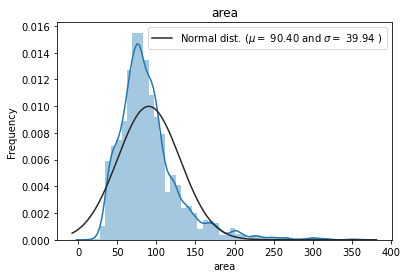

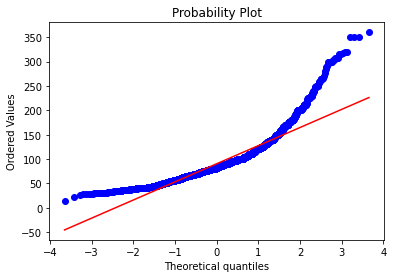


 mu = 5.44 and sigma = 3.61



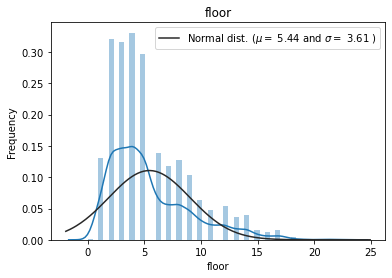

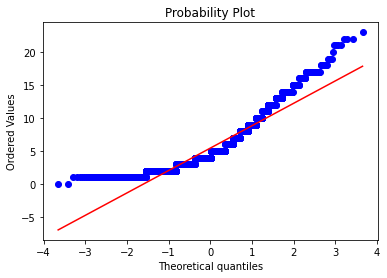


 mu = 40.19 and sigma = 0.02



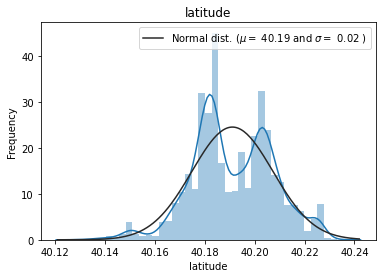

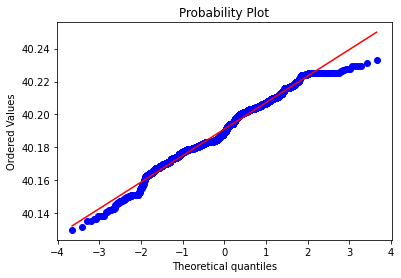


 mu = 44.51 and sigma = 0.02



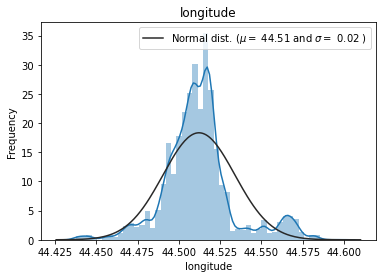

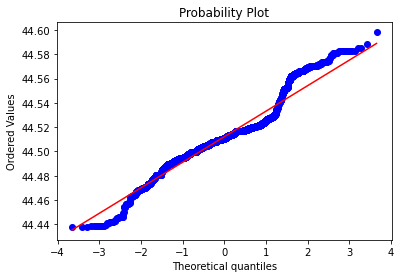


 mu = 139652.14 and sigma = 104534.06



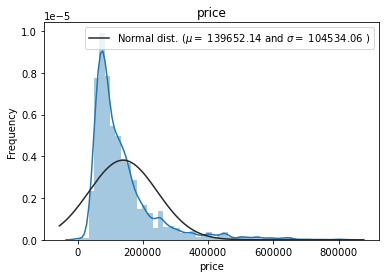

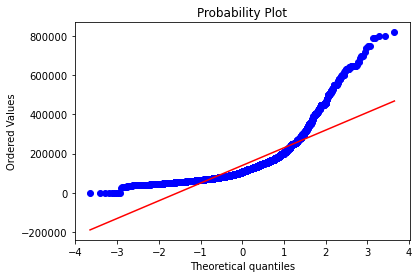


 mu = 9.12 and sigma = 4.48



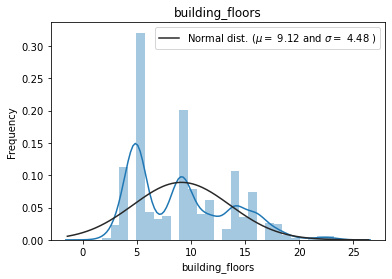

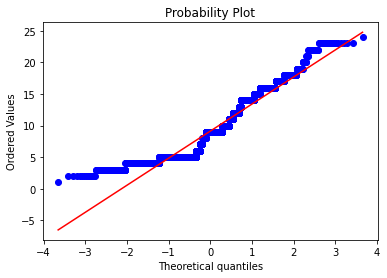


 mu = 567.24 and sigma = 416.05



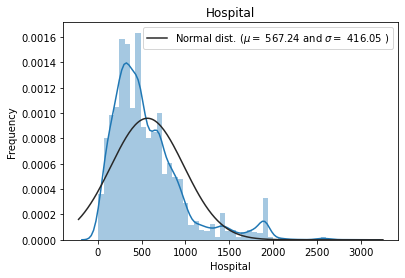

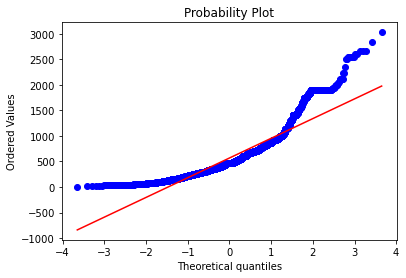


 mu = 315.36 and sigma = 332.40



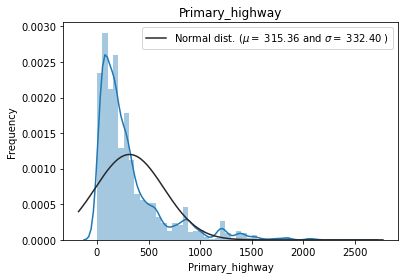

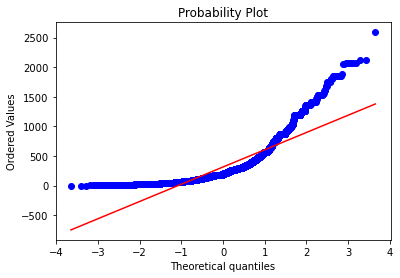


 mu = 230.54 and sigma = 198.18



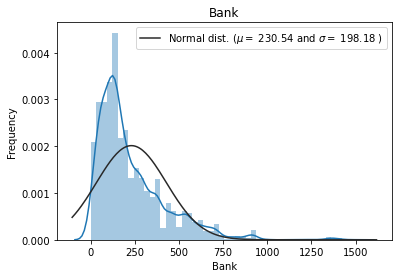

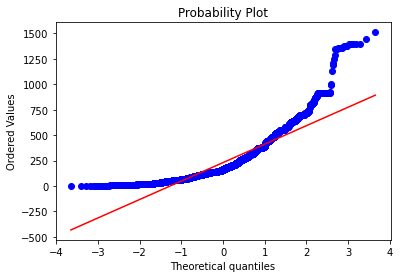


 mu = 680.72 and sigma = 687.16



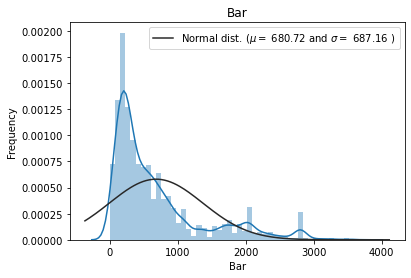

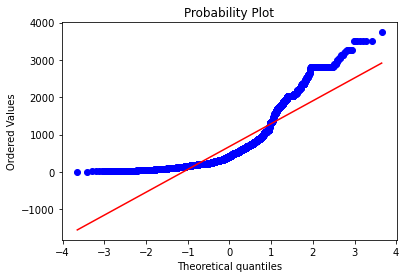


 mu = 181.22 and sigma = 147.42



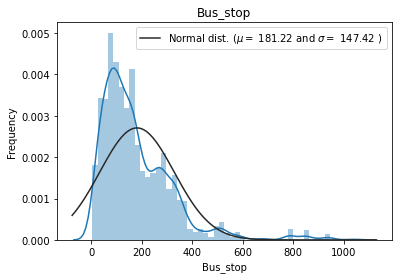

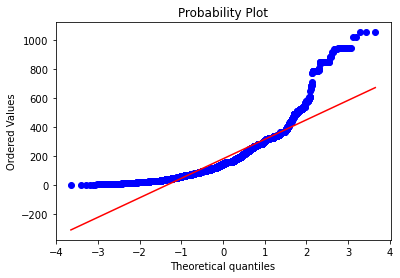


 mu = 385.85 and sigma = 436.43



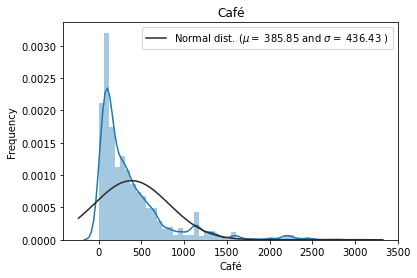

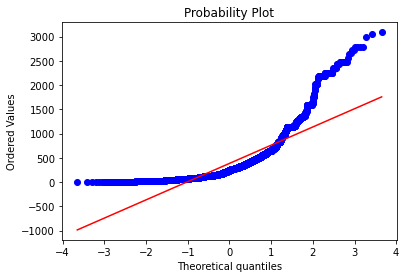


 mu = 928.92 and sigma = 571.50



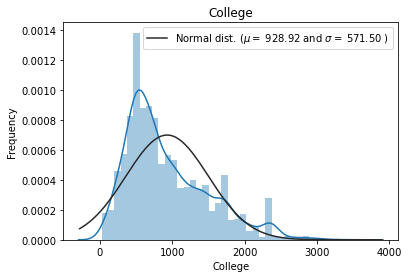

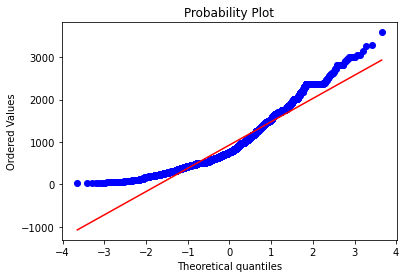


 mu = 426.23 and sigma = 260.15



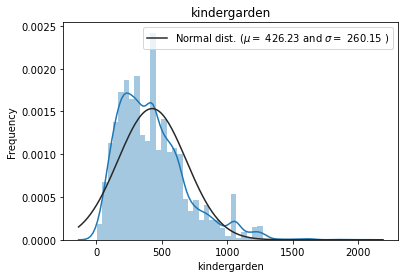

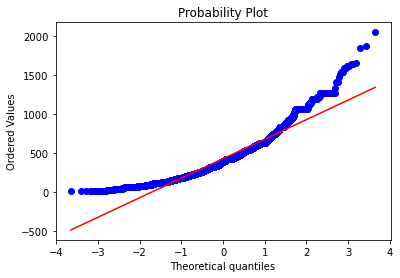


 mu = 1336.90 and sigma = 1228.15



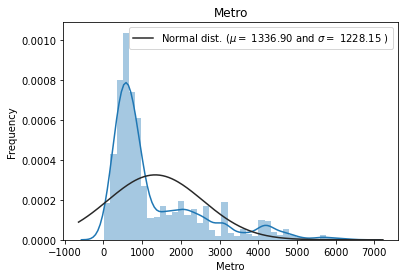

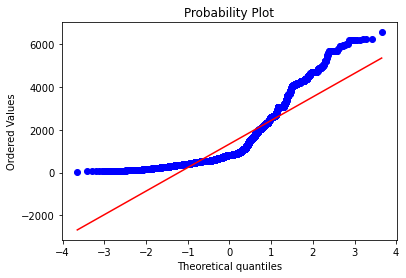


 mu = 973.57 and sigma = 945.50



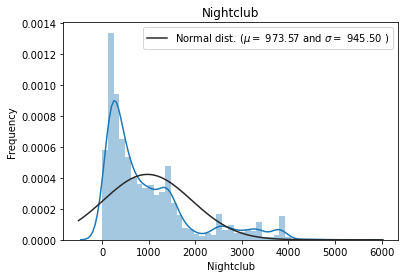

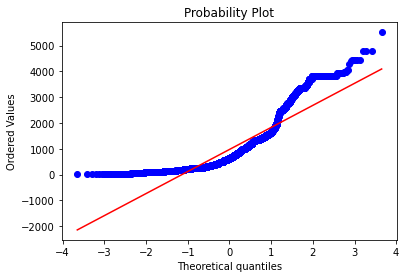


 mu = 1123.36 and sigma = 918.76



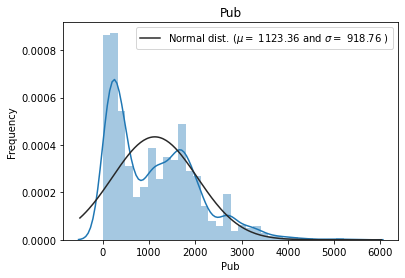

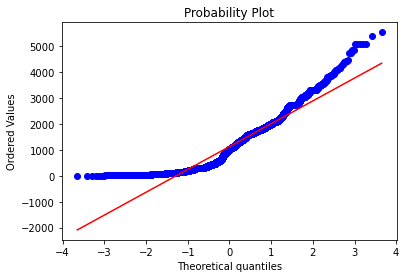


 mu = 229.10 and sigma = 204.61



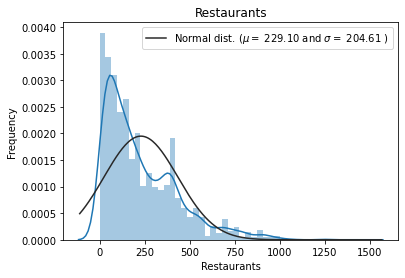

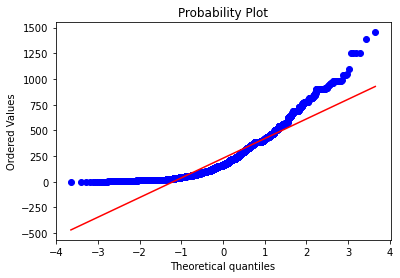


 mu = 310.72 and sigma = 224.47



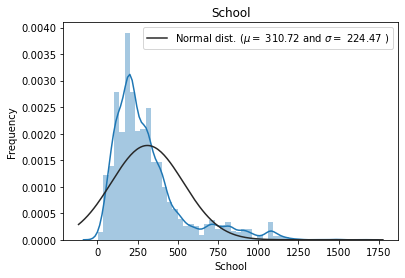

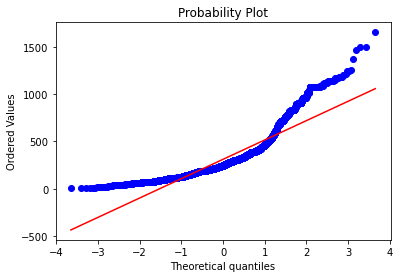


 mu = 337.35 and sigma = 296.99



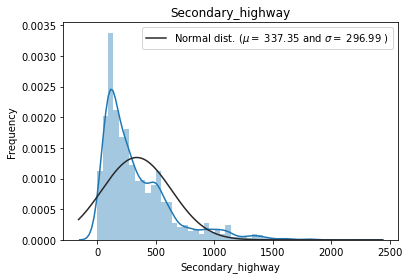

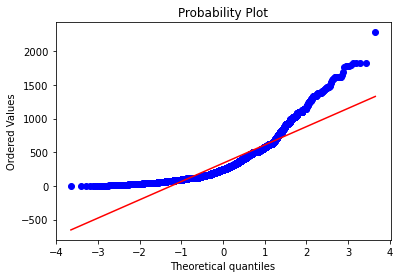


 mu = 227.92 and sigma = 173.70



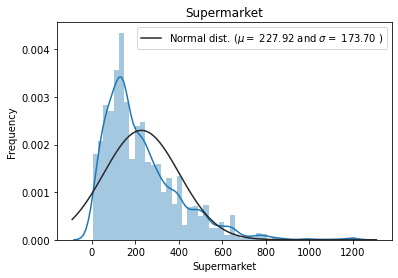

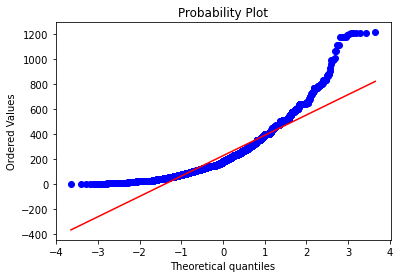


 mu = 801.60 and sigma = 741.80



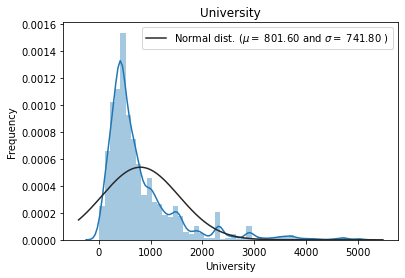

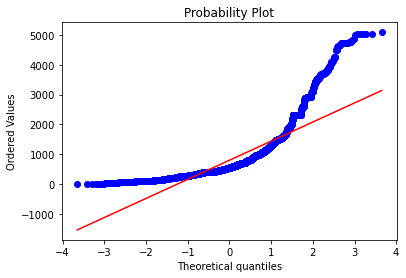


 mu = 2438.76 and sigma = 1719.31



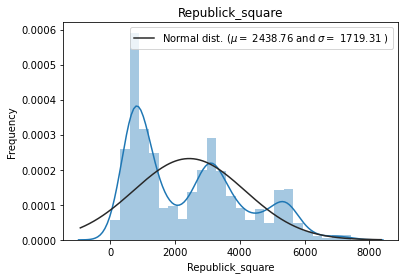

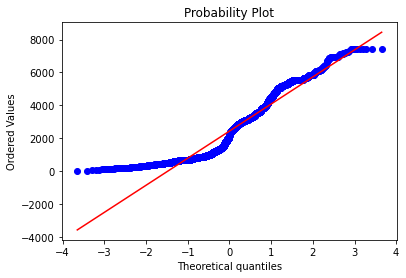


 mu = 2182.19 and sigma = 1523.79



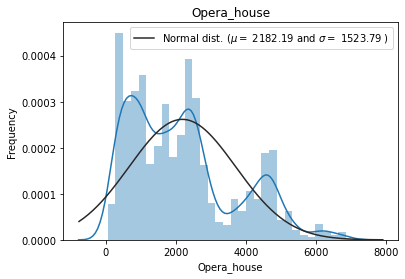

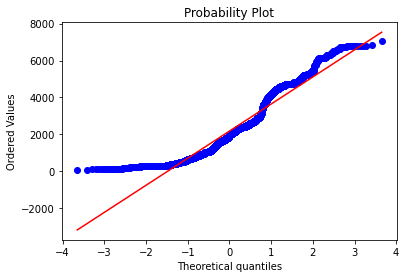

In [91]:
for i in data_numeric.columns:
    sns.distplot(data_numeric[i] , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data_numeric[i])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Frequency')
    plt.title(i)

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(data_numeric[i], plot=plt)
    plt.show()


 mu = 4.43 and sigma = 0.39



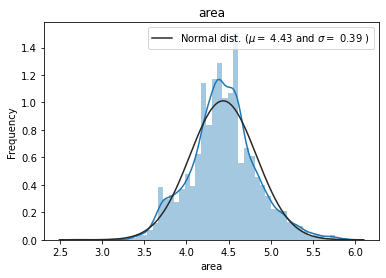

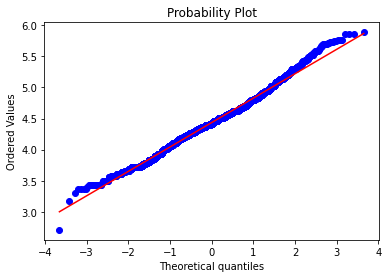


 mu = 1.72 and sigma = 0.54



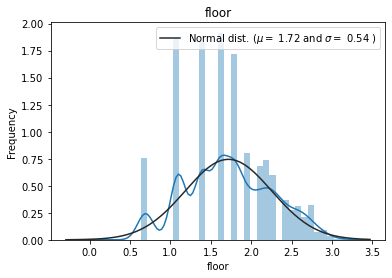

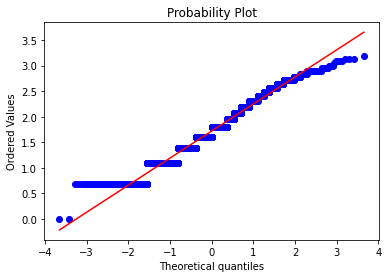


 mu = 3.72 and sigma = 0.00



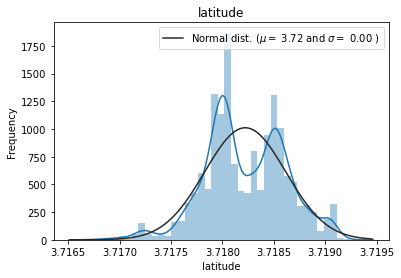

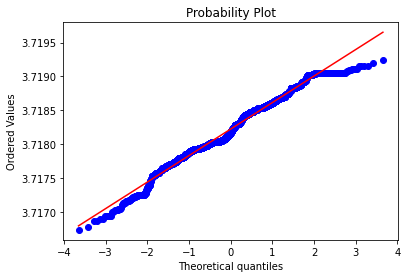


 mu = 3.82 and sigma = 0.00



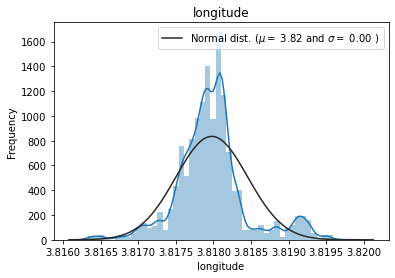

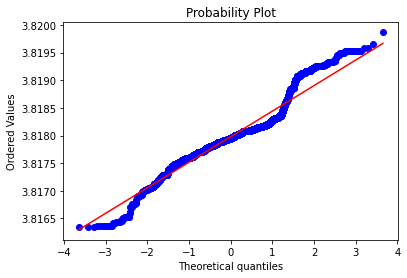


 mu = 11.65 and sigma = 0.61



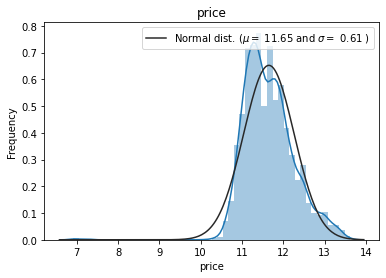

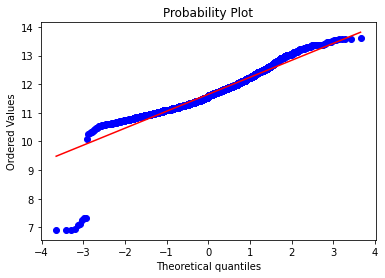


 mu = 2.22 and sigma = 0.44



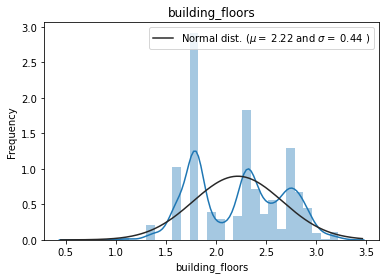

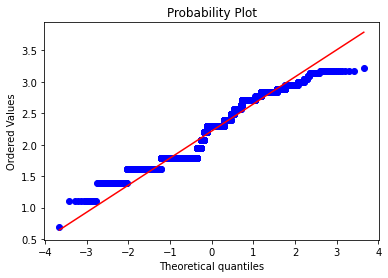


 mu = 6.08 and sigma = 0.77



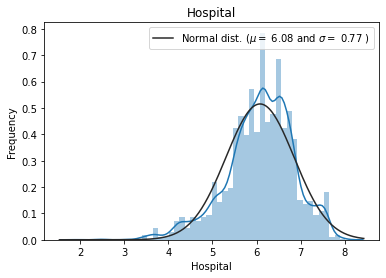

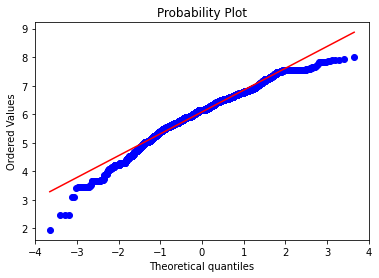


 mu = 5.26 and sigma = 1.06



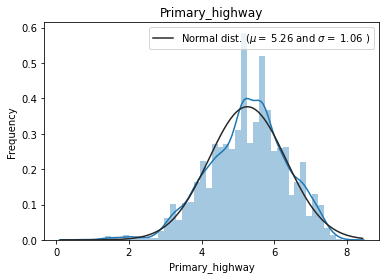

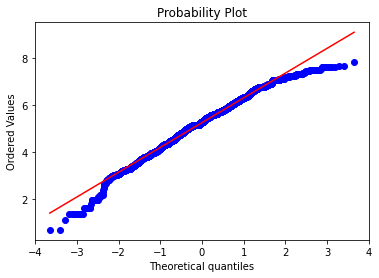


 mu = 5.08 and sigma = 0.93



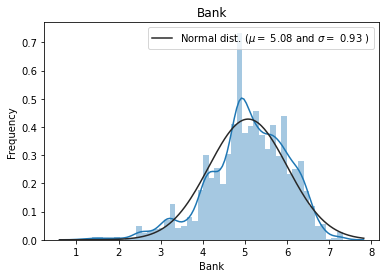

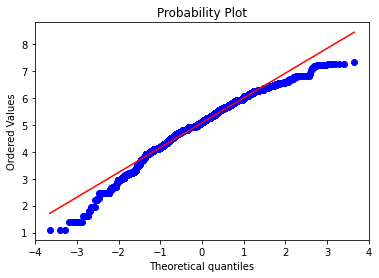


 mu = 6.04 and sigma = 1.02



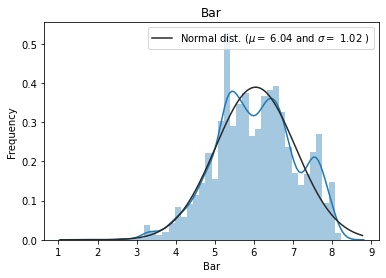

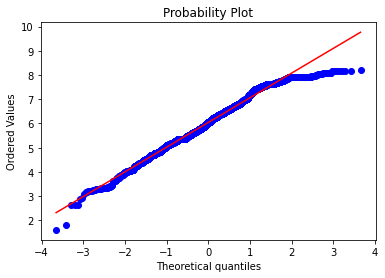


 mu = 4.90 and sigma = 0.84



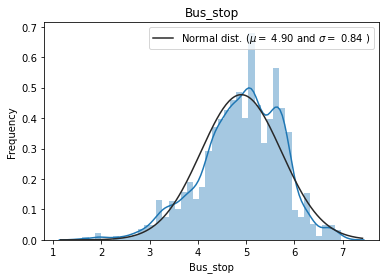

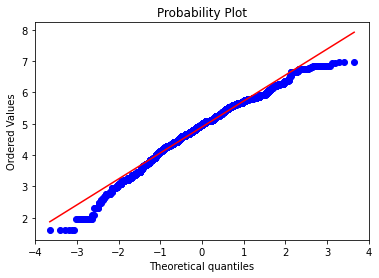


 mu = 5.40 and sigma = 1.13



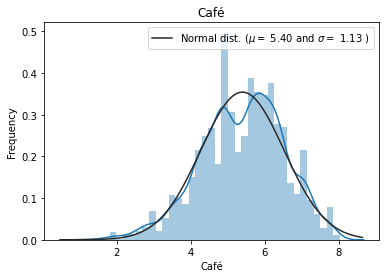

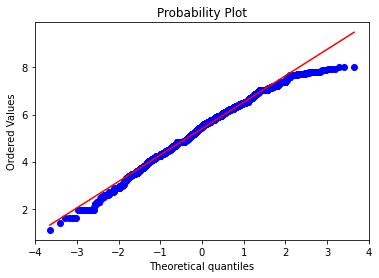


 mu = 6.63 and sigma = 0.68



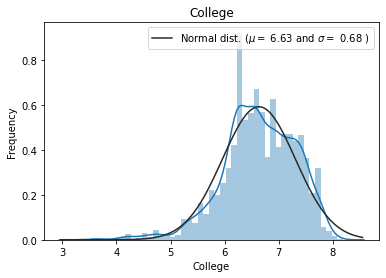

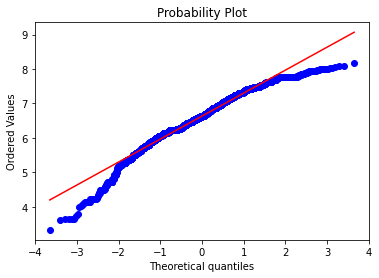


 mu = 5.86 and sigma = 0.68



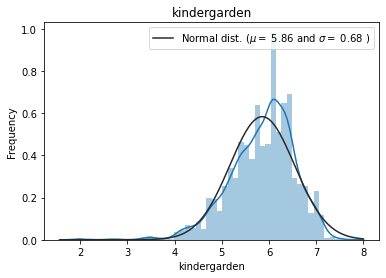

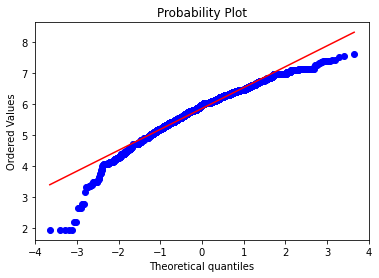


 mu = 6.82 and sigma = 0.87



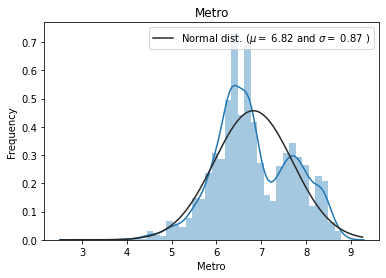

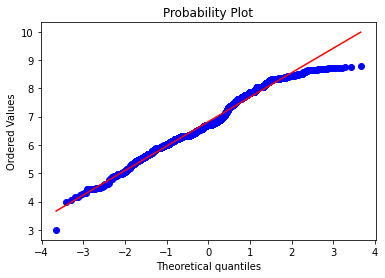


 mu = 6.40 and sigma = 1.05



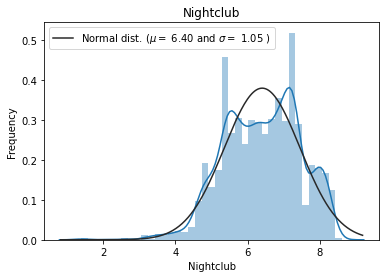

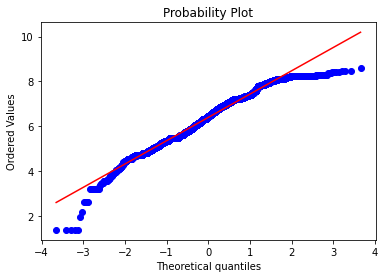


 mu = 6.52 and sigma = 1.21



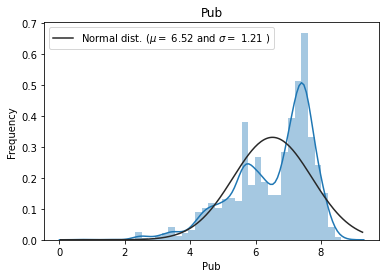

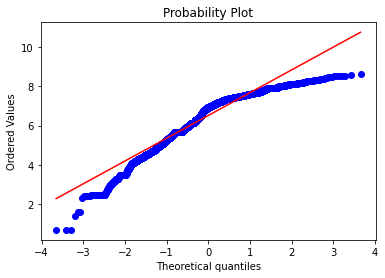


 mu = 4.96 and sigma = 1.10



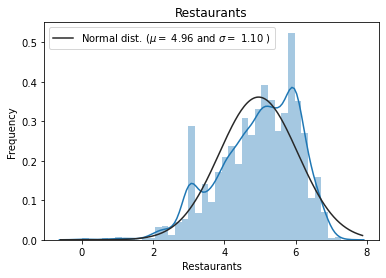

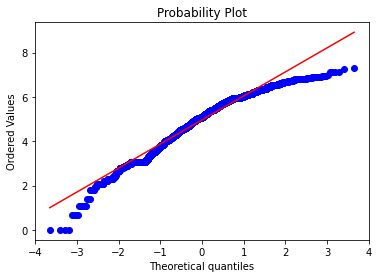


 mu = 5.52 and sigma = 0.68



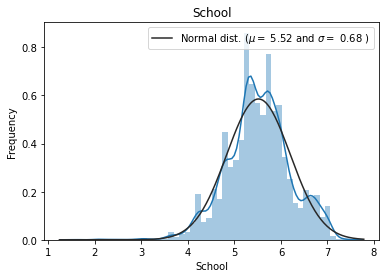

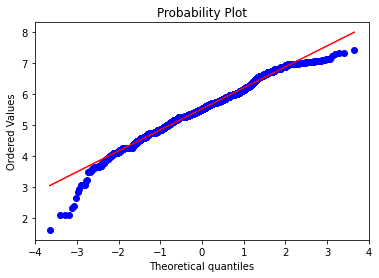


 mu = 5.45 and sigma = 0.93



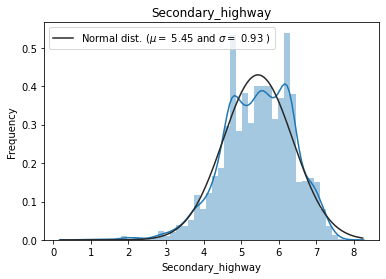

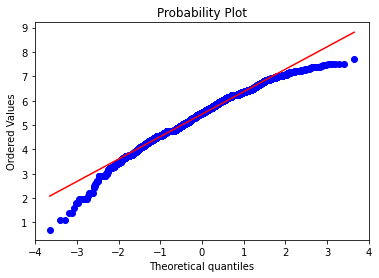


 mu = 5.13 and sigma = 0.86



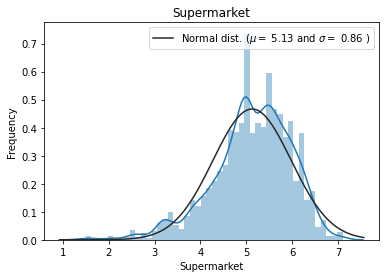

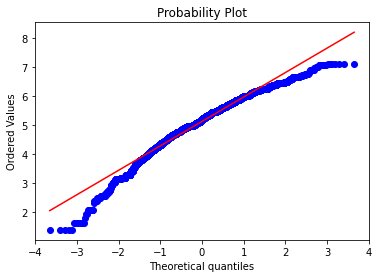


 mu = 6.37 and sigma = 0.81



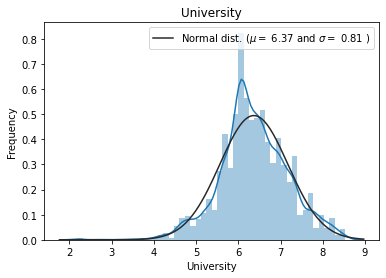

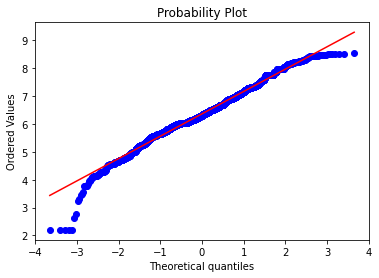


 mu = 7.49 and sigma = 0.85



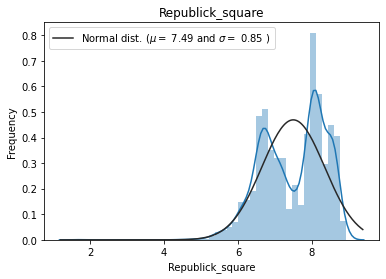

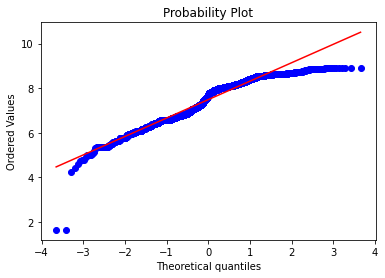


 mu = 7.39 and sigma = 0.85



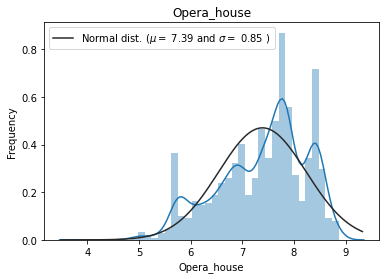

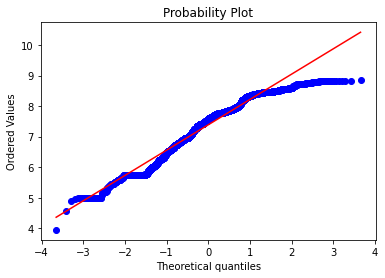

In [92]:
for i in data_numeric.columns:
    data_numeric[i] = np.log1p(data_numeric[i])

    #Check the new distribution 
    sns.distplot(data_numeric[i] , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data_numeric[i])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Frequency')
    plt.title(i)

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(data_numeric[i], plot=plt)
    plt.show()

In [147]:
for i in data_numeric.columns:
    data_numeric= outliers_IQR(data_numeric, i)

In [148]:
len(data_numeric.columns)

24

In [149]:
len(data_object.columns)

34

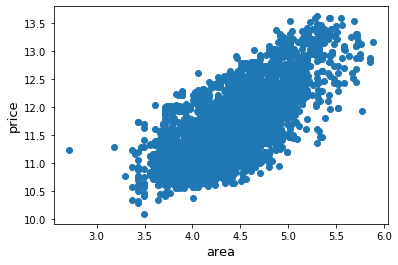

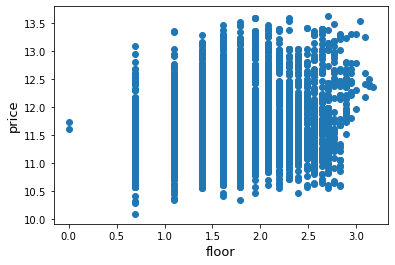

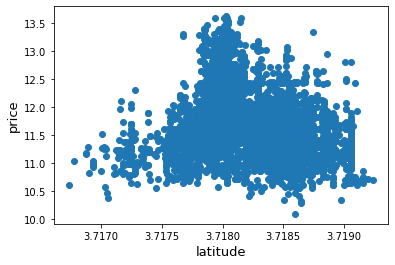

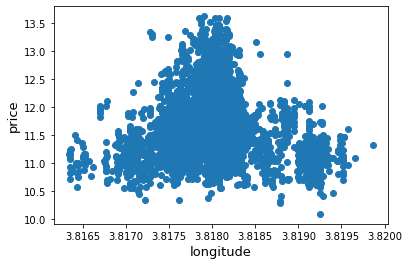

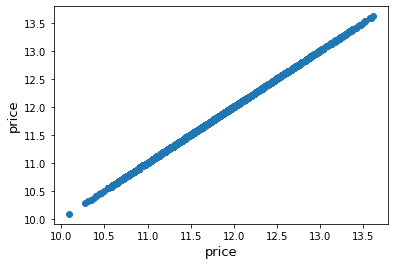

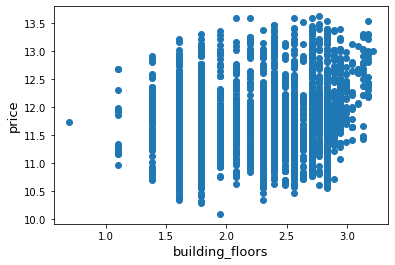

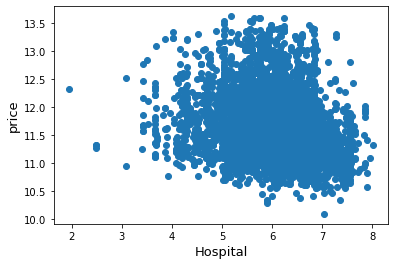

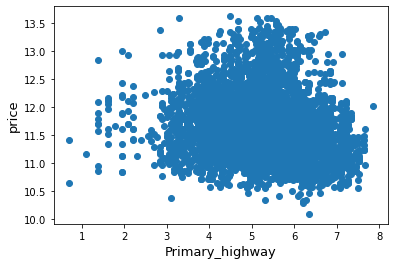

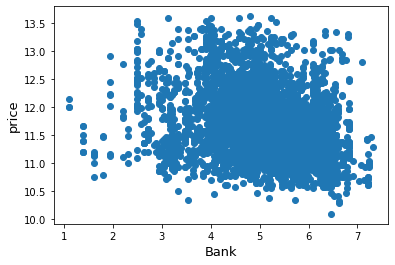

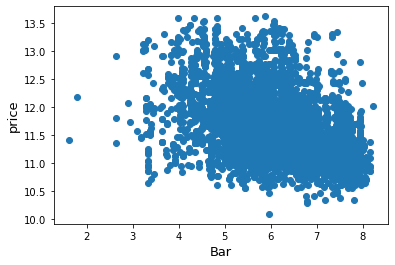

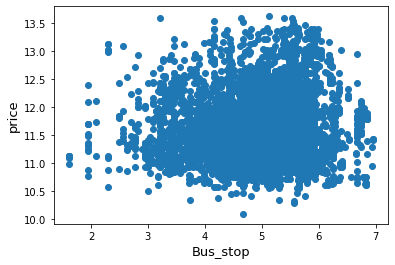

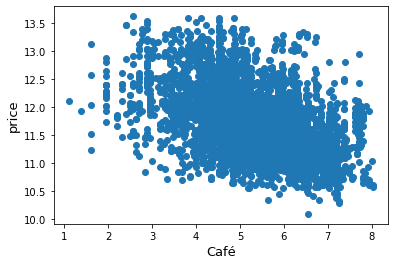

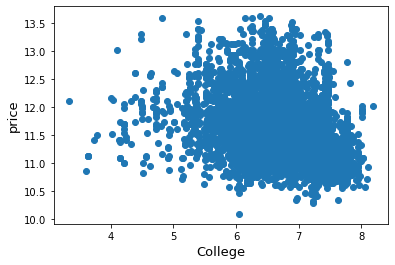

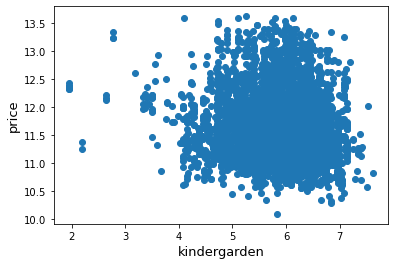

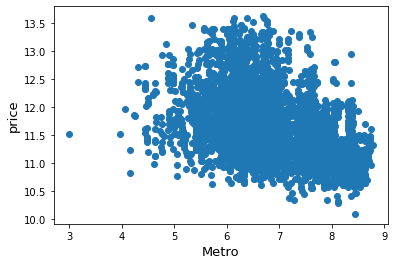

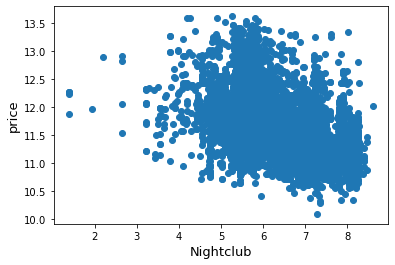

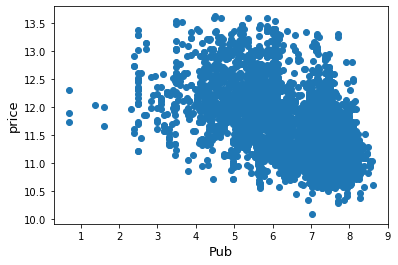

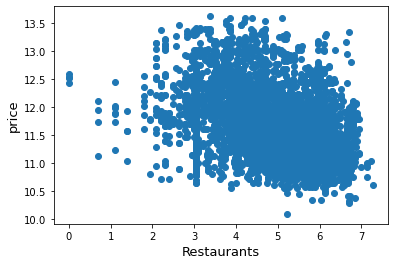

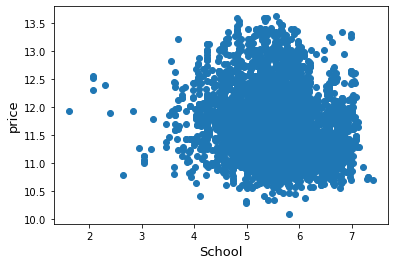

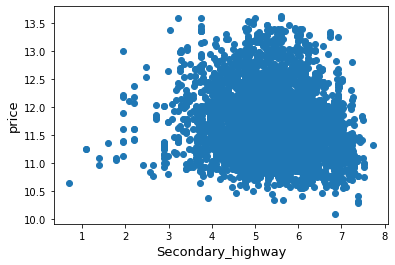

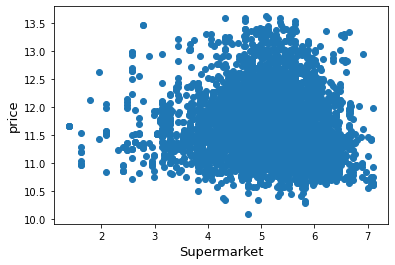

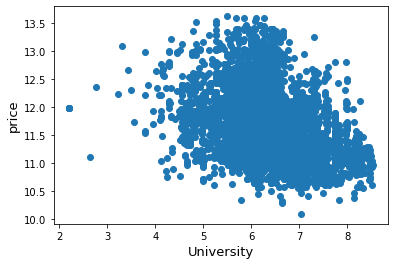

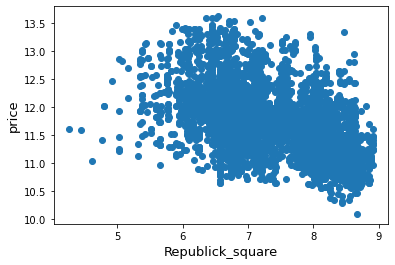

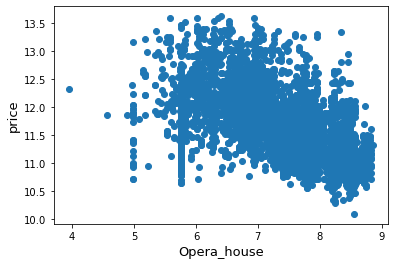

In [96]:
for i in data_numeric.columns:
    fig, ax = plt.subplots()
    ax.scatter(x = data_numeric[i], y = data_numeric['price'])
    plt.ylabel('price', fontsize=13)
    plt.xlabel(i, fontsize=13)
    plt.show()

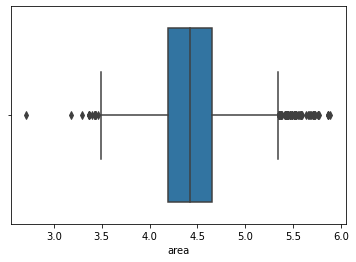

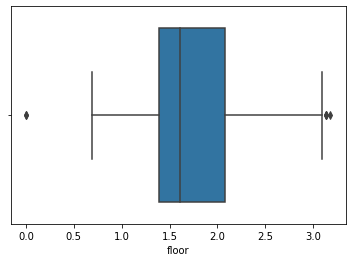

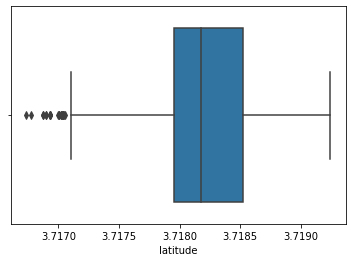

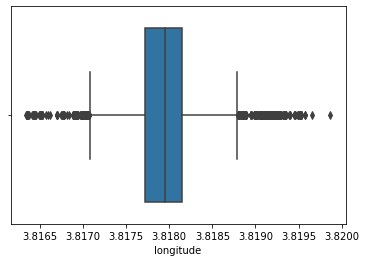

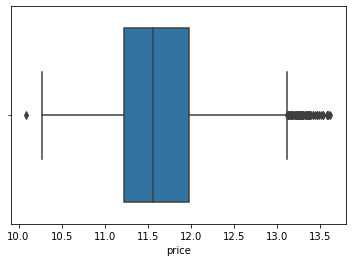

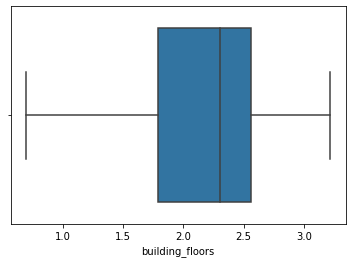

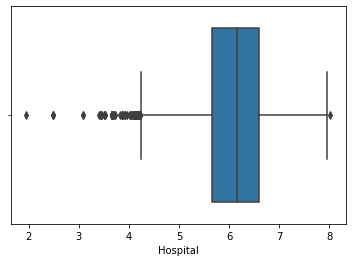

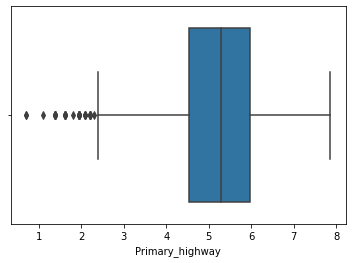

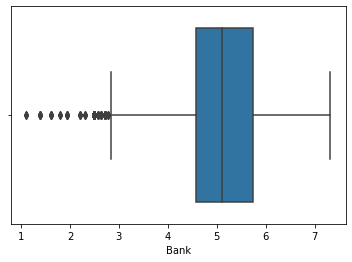

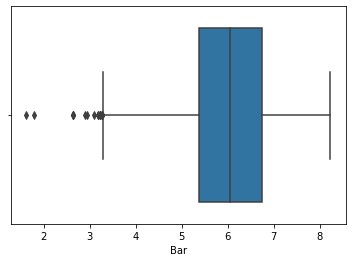

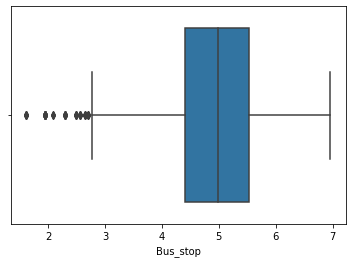

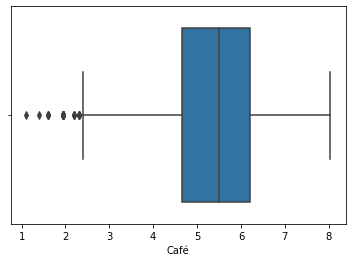

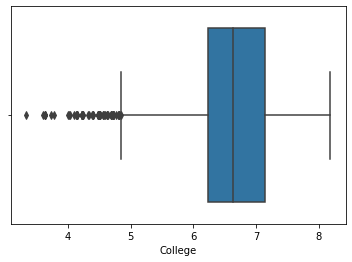

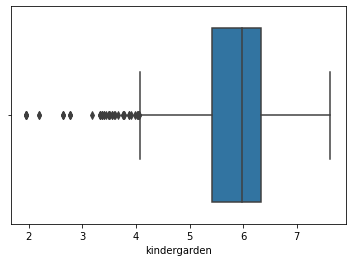

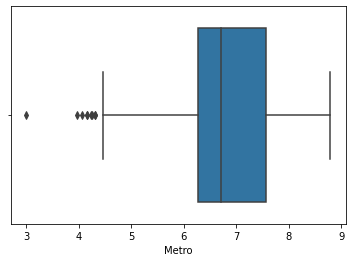

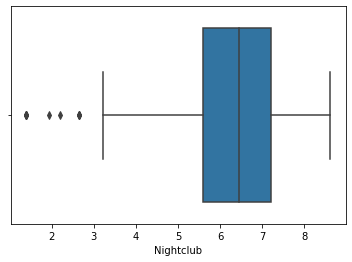

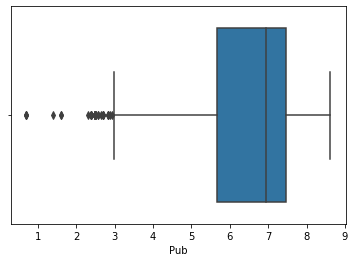

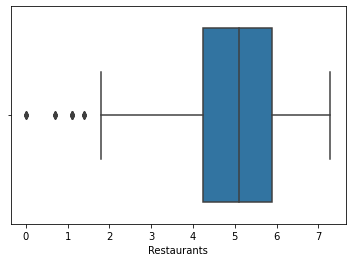

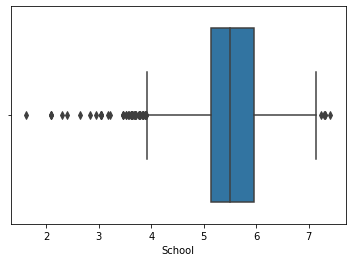

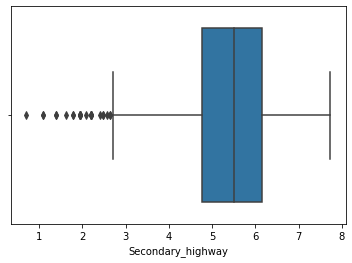

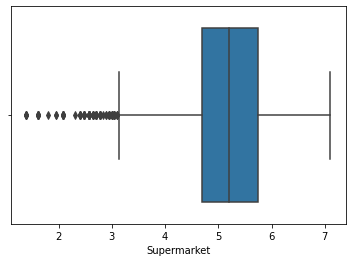

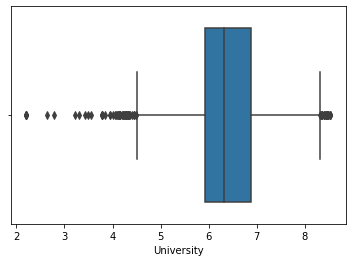

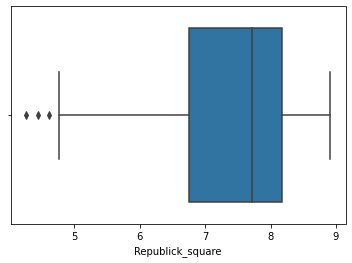

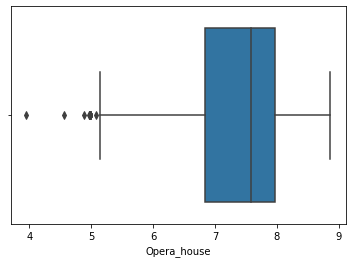

In [97]:
for i in data_numeric.columns:
    sns.boxplot(x=data_numeric[i])
    plt.show()   

In [45]:
data_numeric.columns

Index(['area', 'floor', 'latitude', 'longitude', 'price', 'building_floors',
       'Hospital', 'Primary_highway', 'Bank', 'Bar', 'Bus_stop', 'Café',
       'College', 'kindergarden', 'Metro', 'Nightclub', 'Pub', 'Restaurants',
       'School', 'Secondary_highway', 'Supermarket', 'University',
       'Republick_square', 'Opera_house'],
      dtype='object')

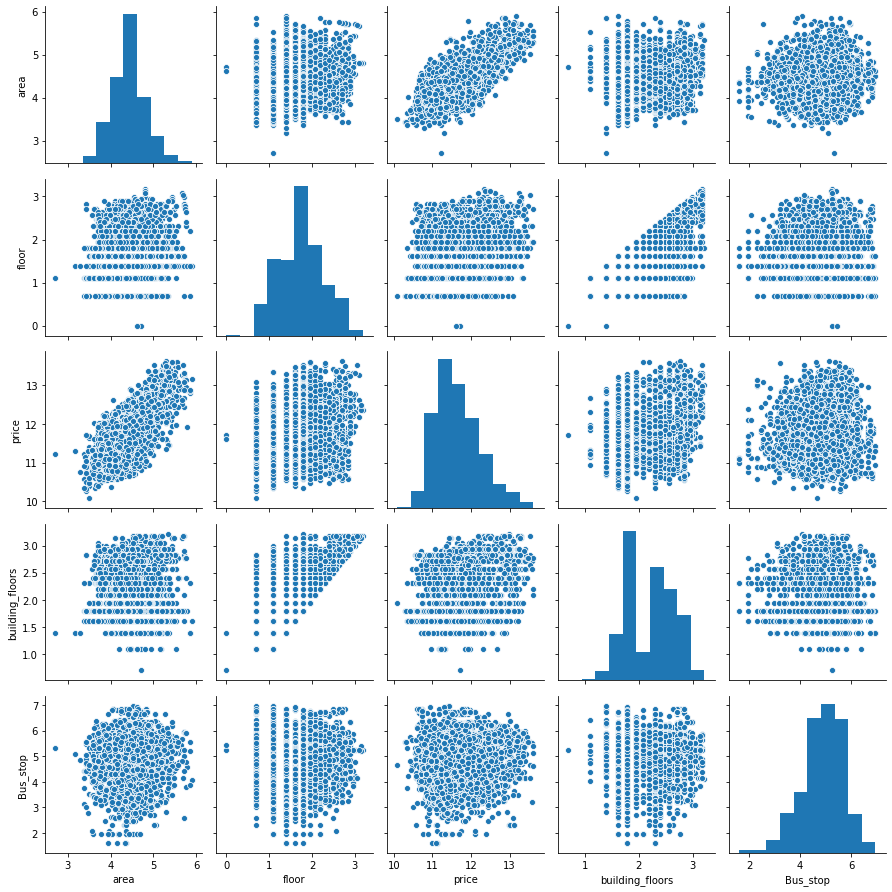

In [1255]:
%matplotlib inline
# Calculate and show pairplot
sns.pairplot(data_numeric[['area', 'floor','price', 'building_floors',"Bus_stop"]])
plt.tight_layout()

In [150]:
z=[]
for i in data_object.street:
    i=i.replace(" ","_")
    i=i.replace(".","_")
    i=i.replace("(","_")
    i=i.replace(")","_")
    i=i.replace("-","_")
    i=i.replace("â","_")
    i=i.replace("","_")
    i=i.replace("¤","_")
    z.append(i)

In [151]:
q=[]
for i in data_object.height:
    i=i.replace(" ","_")
    i=i.replace(".","_")
    i=i.replace("(","_")
    i=i.replace(")","_")
    i=i.replace("-","_")
    q.append(i)

In [152]:
data_object.street=z
data_object.height=q

C:\Users\arman\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [153]:
data_numeric.columns

Index(['area', 'floor', 'latitude', 'longitude', 'price', 'building_floors',
       'Hospital', 'Primary_highway', 'Bank', 'Bar', 'Bus_stop', 'Café',
       'College', 'kindergarden', 'Metro', 'Nightclub', 'Pub', 'Restaurants',
       'School', 'Secondary_highway', 'Supermarket', 'University',
       'Republick_square', 'Opera_house'],
      dtype='object')

In [154]:
data_numeric.drop(["longitude","latitude"],axis=1,inplace=True) 
data_numeric.drop(["Opera_house",],axis=1,inplace=True)
#data_numeric.drop(["Café","Restaurants"],axis=1,inplace=True)
#data_numeric.drop(["Bank","Bar","Pub"],axis=1,inplace=True)
#data_numeric.drop(["Primary_highway"],axis=1,inplace=True)
data_object.drop(["sold"],axis=1,inplace=True)

C:\Users\arman\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [103]:
data_object.columns

Index(['Air_conditioner', 'Central_Heating', 'Close_bus_station', 'Equipment',
       'Euro_windows', 'Furniture', 'Gas', 'Heated_Floor', 'Heating',
       'Hot_water', 'Internet', 'Irrigation', 'Laminate_flooring',
       'Open_balcony', 'Parking', 'Parquet', 'Playground', 'Security_system',
       'Sewerage', 'Standing_water', 'Sunny', 'Swimming_pool', 'Tile', 'View',
       'Water', 'bathrooms', 'building_type', 'condition', 'district',
       'height', 'new_construction', 'rooms', 'street'],
      dtype='object')

In [105]:
data_dummies=pd.get_dummies(data_object,prefix=data_object.columns,drop_first=True)

In [94]:
pd.get_dummies(pd.DataFrame({"street":"komitas"},index=[0]))

street_komitas
0               1

In [156]:
data_final_maqur=data_numeric.join(data_object)

In [106]:
data_final=data_numeric.join(data_dummies)

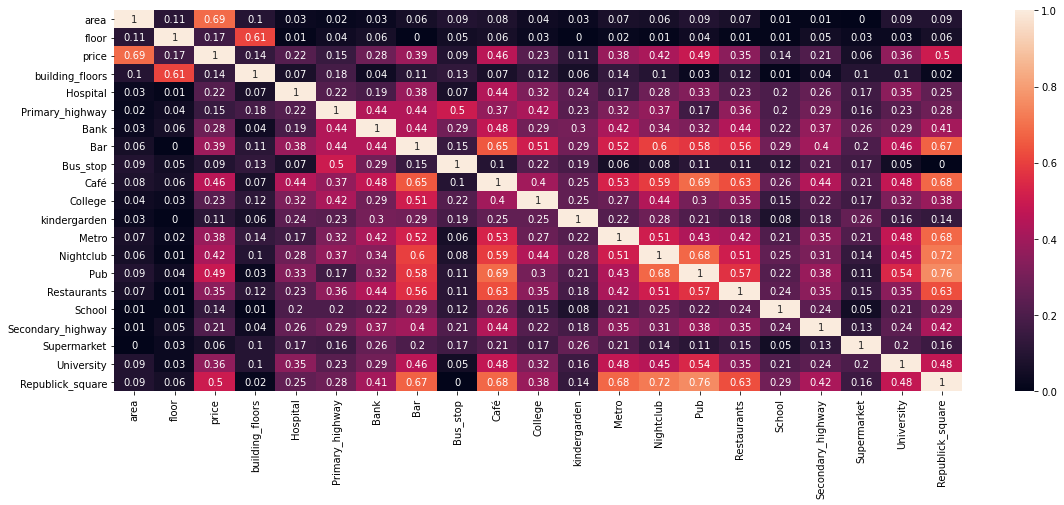

In [250]:
plt.figure(figsize=(19, 7))
sns.heatmap(data_numeric.corr().abs().round(2), annot=True)
plt.show()

In [109]:
data_final.shape

(5285, 167)

### OLS Regression

In [1298]:
var=data_ols.columns.tolist()

In [1299]:
var

['area',
 'floor',
 'price',
 'building_floors',
 'Hospital',
 'Primary_highway',
 'Bank',
 'Bar',
 'Bus_stop',
 'Café',
 'College',
 'kindergarden',
 'Metro',
 'Nightclub',
 'Pub',
 'Restaurants',
 'School',
 'Secondary_highway',
 'Supermarket',
 'University',
 'Republick_square',
 'Air_conditioner_1',
 'Central_Heating_1',
 'Close_bus_station_1',
 'Equipment_1',
 'Euro_windows_1',
 'Furniture_1',
 'Gas_1',
 'Heated_Floor_1',
 'Heating_1',
 'Hot_water_1',
 'Internet_1',
 'Irrigation_1',
 'Laminate_flooring_1',
 'Open_balcony_1',
 'Parking_1',
 'Parquet_1',
 'Playground_1',
 'Security_system_1',
 'Sewerage_1',
 'Standing_water_1',
 'Sunny_1',
 'Swimming_pool_1',
 'Tile_1',
 'View_1',
 'Water_1',
 'bathrooms_1',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'building_type_Other',
 'building_type_Panel',
 'building_type_Stone',
 'condition_Newly_repaired',
 'condition_Zero_condition',
 'district_Arabkir',
 'district_Avan',
 'district_Center',
 'district_Davtashen',
 'district_Erebuni'

In [1300]:
del var[2]

In [1301]:
var="+".join(var)
formula="price~" + var
formula

'price~area+floor+building_floors+Hospital+Primary_highway+Bank+Bar+Bus_stop+Café+College+kindergarden+Metro+Nightclub+Pub+Restaurants+School+Secondary_highway+Supermarket+University+Republick_square+Air_conditioner_1+Central_Heating_1+Close_bus_station_1+Equipment_1+Euro_windows_1+Furniture_1+Gas_1+Heated_Floor_1+Heating_1+Hot_water_1+Internet_1+Irrigation_1+Laminate_flooring_1+Open_balcony_1+Parking_1+Parquet_1+Playground_1+Security_system_1+Sewerage_1+Standing_water_1+Sunny_1+Swimming_pool_1+Tile_1+View_1+Water_1+bathrooms_1+bathrooms_2+bathrooms_3+bathrooms_4+building_type_Other+building_type_Panel+building_type_Stone+condition_Newly_repaired+condition_Zero_condition+district_Arabkir+district_Avan+district_Center+district_Davtashen+district_Erebuni+district_Malatia+district_Nor+district_Norq+district_Qanaqer+district_Shengavit+district_Vahagni+height_2_8_M+height_3_2_M+height_3_8_M+height_3_M+new_construction_1+rooms_2+rooms_3+rooms_4+rooms_5+rooms_6+rooms_7+street_A_Khachatrian+st

In [1302]:
model1=ols(formula=formula,data=data_ols)
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     292.1
Date:                Tue, 11 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:46:31   Log-Likelihood:                 988.83
No. Observations:                5285   AIC:                            -1714.
Df Residuals:                    5153   BIC:                            -846.1
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      8.2240      0.141     58.168      0.000       7.947       8.501
area                           0.7407      0.014     53.139      0.000       0.713       0.768
floor                         -0.0233      0.007     -3.382      0.001      -0.037      -0.010
building_floors                0.0631      0.013      5.043      0.000       0.039       0.088
Hospital                       0.0050      0.006      0.900      0.368      -0.006       0.016
Primary_highway                0.0044      0.005      0.962      0.336      -0.005       0.013
Bank                          -0.0222      0.005     -4.765      0.000      -0.031      -0.013
Bar                           -0.0215      0.006     -3.855      0.000      -0.032      -0.011
Bus_stop                      -0.0096      0.005     -2.007      0.045      -0.019      -0.000
Café                          -0.0270      0.005     -5.405      0.000      -0.037      -0.017
College                       -0.0214      0.007     -3.194      0.001      -0.034      -0.008
kindergarden                  -0.0192      0.006     -3.397      0.001      -0.030      -0.008
Metro                         -0.0243      0.008     -3.215      0.001      -0.039      -0.009
Nightclub                     -0.0208      0.006     -3.383      0.001      -0.033      -0.009
Pub                           -0.0453      0.006     -7.345      0.000      -0.057      -0.033
Restaurants                   -0.0010      0.004     -0.233      0.816      -0.009       0.007
School                        -0.0121      0.005     -2.450      0.014      -0.022      -0.002
Secondary_highway             -0.0021      0.004     -0.476      0.634      -0.011       0.007
Supermarket                    0.0141      0.004      3.379      0.001       0.006       0.022
University                     0.0092      0.006      1.475      0.140      -0.003       0.021
Republick_square               0.0645      0.011      5.743      0.000       0.042       0.086
Air_conditioner_1              0.0404      0.009      4.692      0.000       0.024       0.057
Central_Heating_1              0.0195      0.009      2.081      0.038       0.001       0.038
Close_bus_station_1           -0.0353      0.009     -3.722      0.000      -0.054      -0.017
Equipment_1                    0.0084      0.012      0.696      0.486      -0.015       0.032
Euro_windows_1                 0.0117      0.010      1.217      0.224      -0.007       0.031
Furniture_1                    0.0217      0.012      1.807      0.071      -0.002       0.045
Gas_1                         -0.0231      0.011     -2.128      0.033      -0.044      -0.002
Heated_Floor_1                 0.0676      0.013      5.150      0.000       0.042       0.093
Heating_1                      0.0449      

In [1303]:
ols_summary=pd.read_html(result.summary().tables[1].as_html(),header=0)[0]
ols_summary=ols_summary.rename(columns={"Unnamed: 0":"Parameter"})
ols_summary[["Parameter","coef"]][(ols_summary["P>|t|"]<0.05)]

Parameter    coef
0                Intercept  8.2240
1                     area  0.7407
2                    floor -0.0233
3          building_floors  0.0631
6                     Bank -0.0222
..                     ...     ...
130  street_Tsarav_Aghbyur  0.3659
131        street_Tumanyan  0.3171
133      street_Vardanants  0.2209
135       street_Yekmalyan  0.2823
136          street_Zakyan  0.1911

[82 rows x 2 columns]

In [1304]:
def evaluation(y_test,y_pred):
    mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    return rmse

In [1305]:
train,test=train_test_split(data_final,test_size=0.2,random_state=42)

In [1306]:
model2=ols(formula=formula,data=train).fit()
pred=model2.predict(test)

In [1307]:
pred=np.expm1(pred)

In [1308]:
a=np.exp(test.price)

In [1309]:
r2=r2_score(a,pred)
r2

0.845007072107984

In [1310]:
evaluation(a,pred)

39858.80144534325

In [1289]:
from statsmodels.formula.api import ols
from scipy import stats
stats.ttest_ind(data_numeric.price[data_object.sold==1],
               data_numeric.price[data_object.sold==0])

Ttest_indResult(statistic=-2.9978028749441092, pvalue=0.002731991191934501)

In [1311]:
y, X = dmatrices(formula, data_final, return_type='dataframe')

In [1312]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\arman\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\arman\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [1313]:
vif.sort_values(by="VIF Factor",ascending=False).round(1)[:60]

VIF Factor                   features
62          inf              district_Norq
100         inf             street_Lvovyan
57          inf            district_Center
58          inf         district_Davtashen
59          inf           district_Erebuni
61          inf               district_Nor
63          inf           district_Qanaqer
64          inf         district_Shengavit
65          inf           district_Vahagni
125         inf               street_Sasna
55          inf           district_Arabkir
89          inf           street_Davtashen
90          inf  street_Davtashen_district
92          inf            street_Gyurjyan
99          inf        street_Leningradyan
56          inf              district_Avan
114         inf     street_Other_Davtashen
105         inf          street_Moldovakan
110         inf     street_Other_Achapnyak
119         inf       street_Other_Qanaqer
118         inf          street_Other_Norq
104         inf             street_Mikoyan
117         inf           street_Other_Nor
116         inf       street_Other_Malatia
121         inf       street_Other_Vahagni
46        204.6                bathrooms_1
47        181.2                bathrooms_2
112        52.1          street_Other_Avan
113        45.1        street_Other_Center
130        42.0      street_Tsarav_Aghbyur
66         37.2               height_2_8_M
69         33.9                 height_3_M
115        31.4       street_Other_Erebuni
48         29.5                bathrooms_3
67         19.3               height_3_2_M
103        14.3            street_Mashtots
111        14.2       street_Other_Arabkir
120        14.1     street_Other_Shengavit
60         13.0           district_Malatia
81         12.2           street_Antarayin
20         11.4           Republick_square
83         11.1            street_Argishti
98         10.6             street_Komitas
126        10.3               street_Sayat
129        10.2              street_Tigran
80          9.5             street_Amiryan
88          9.5            street_Charents
133         9.0          street_Vardanants
78          8.9             street_Abovyan
72          8.4                    rooms_3
87          8.2              street_Buzand
123         8.0             street_Pushkin
134         7.8            street_Y_Kochar
82          7.7                street_Aram
131         7.5            street_Tumanyan
124         7.4              street_Saryan
73          7.2                    rooms_4
14          7.1                        Pub
93          6.5       street_Hanrapetutyan
97          6.3           street_Koghbatsi

In [689]:
LR = LinearRegression()
loo = LeaveOneOut()

sfs = SFS(estimator=LR, 
k_features=7, 
forward=True, 
floating=True, 
scoring='neg_mean_squared_error',
cv = loo,
n_jobs = -1)
sfs = sfs.fit(X, Y)

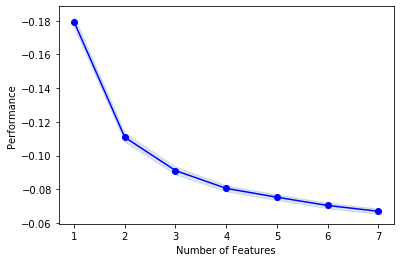

In [695]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


plot_sfs(sfs.get_metric_dict(), kind='std_err');

plt.gca().invert_yaxis()

In [340]:
data_final.columns

Index(['area', 'floor', 'price', 'building_floors', 'Hospital',
       'Primary_highway', 'Bank', 'Bar', 'Bus_stop', 'Café',
       ...
       'street_Sundukyan', 'street_Teryan', 'street_Tigran',
       'street_Tsarav_Aghbyur', 'street_Tumanyan', 'street_V_Papazyan',
       'street_Vardanants', 'street_Y_Kochar', 'street_Yekmalyan',
       'street_Zakyan'],
      dtype='object', length=138)

In [60]:
data_final.drop("Pub",axis=1,inplace=True)

### Random Forest Regression Feature Importnaces

In [72]:
X_train, y_train = data_final.drop('price',axis=1), data_final['price']
X_train['random'] = np.random.random(size=len(X_train))
rf = RandomForestRegressor(
         n_estimators=100,
         n_jobs=-1,
         oob_score=True)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True)

In [62]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df = fi_df.sort_values(by=['feature_importance'], ascending=False)
    fi_df = fi_df.iloc[:30,:]
#Define size of bar plot
    plt.figure(figsize=(10,6))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

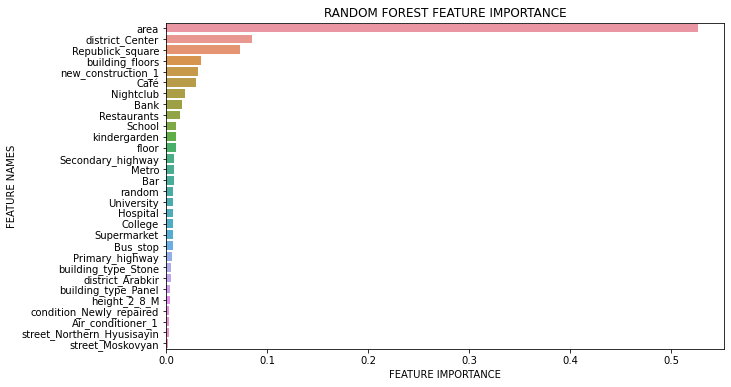

In [65]:
plot_feature_importance(rf.feature_importances_,X_train.columns,'RANDOM FOREST ')

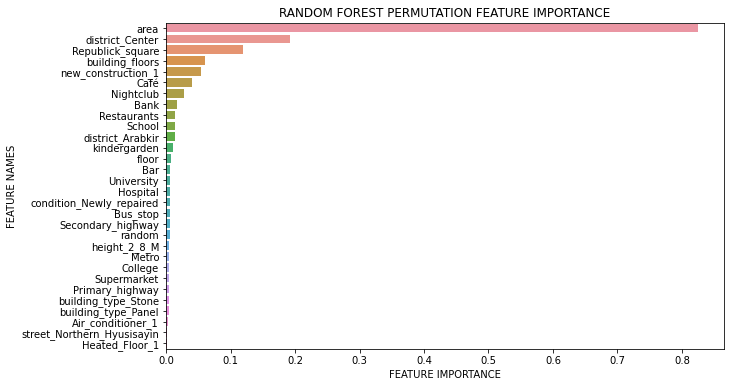

In [67]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
fi_df_1 = perm_imp_rfpimp.sort_values(by=['Importance'], ascending=False)
fi_df_1 = fi_df_1.iloc[:30,:]
plt.figure(figsize=(10,6))
sns.barplot(x=fi_df_1.Importance,y=fi_df_1.index)
plt.title('RANDOM FOREST PERMUTATION FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

In [70]:
def dropcol_importances(rf, X_train, y_train):
    rf_ = clone(rf)
    rf_.random_state = 999
    rf_.fit(X_train, y_train)
    baseline = rf_.oob_score_
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        rf_ = clone(rf)
        rf_.random_state = 999
        rf_.fit(X, y_train)
        o = rf_.oob_score_
        imp.append(baseline - o)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=True)
    return I

In [73]:
rf.fit(X_train, y_train) # rf must be pre-trained
imp_drop_col = dropcol_importances(rf, X_train, y_train)

In [ ]:
filename = 'rf_model_drop_col.sav'
pickle.dump(rf, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

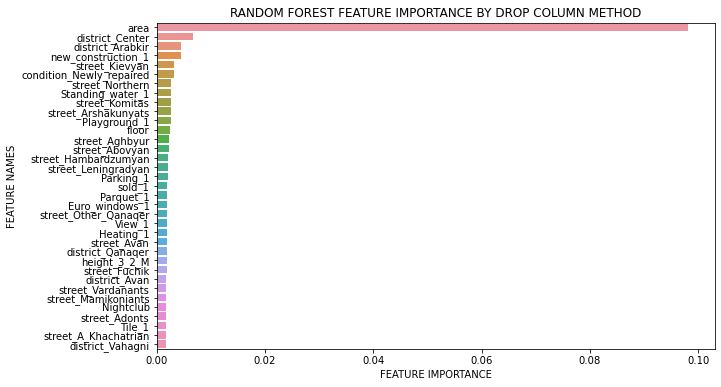

In [78]:
fi_df_2 = imp_drop_col.sort_values(by=['Importance'], ascending=False)
fi_df_2 = fi_df_2.iloc[:35,:]
plt.figure(figsize=(10,6))
sns.barplot(x=fi_df_2.Importance,y=fi_df_2.index)
plt.title('RANDOM FOREST FEATURE IMPORTANCE BY DROP COLUMN METHOD')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

In [68]:
from rfpimp import *
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = data_final

# attentuate affect of outliers in price
#df['price'] = np.log(df['price'])

df_train, df_test = train_test_split(df, test_size=0.20)

features = df.columns.tolist()
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('price',axis=1), df_train['price']
X_test, y_test = df_test.drop('price',axis=1), df_test['price']
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)



imp_perm_1 = importances(rf, X_test, y_test) # permutation
imp_perm_1

Importance
Feature                        
area                   0.770148
district_Center        0.179512
Republick_square       0.043466
building_floors        0.037069
new_construction_1     0.036620
...                         ...
rooms_7               -0.000317
Sewerage_1            -0.000693
street_Mamikoniants   -0.001090
Heated_Floor_1        -0.001290
Air_conditioner_1     -0.001345

[167 rows x 1 columns]

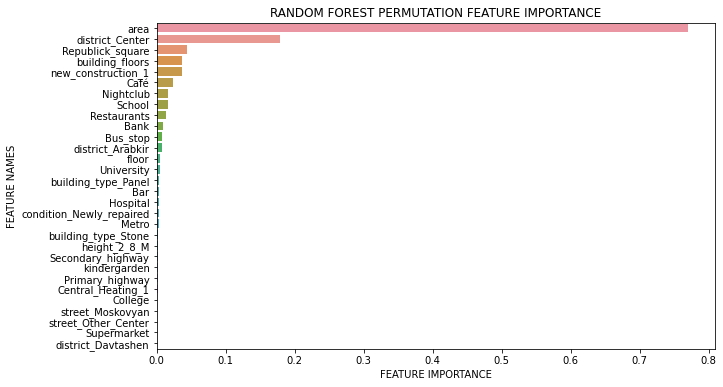

In [69]:
fi_df_3 = imp_perm_1.sort_values(by=['Importance'], ascending=False)
fi_df_3 = fi_df_3.iloc[:30,:]


plt.figure(figsize=(10,6))
sns.barplot(x=fi_df_3.Importance,y=fi_df_3.index)
plt.title('RANDOM FOREST PERMUTATION FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

## Train Test Spliting

In [365]:
X=data_final.drop("price",axis=1)
Y=data_final.price
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

### Generalized Linear Model

In [184]:
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines

X = sm.add_constant(X)

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(y, X, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

gamma_results.summary()

C:\Users\arman\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                 5285
Model:                            GLM   Df Residuals:                     5152
Model Family:                   Gamma   Df Model:                          132
Link Function:          inverse_power   Scale:                      0.00028972
Method:                          IRLS   Log-Likelihood:                 1129.6
Date:                Mon, 10 Aug 2020   Deviance:                       1.4879
Time:                        16:18:58   Pearson chi2:                     1.49
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0971      0.001     98.919      0.000       0.095       0.099
area                          -0.0053   9.95e-05    -52.819      0.000      -0.005      -0.005
floor                          0.0002   4.98e-05      3.697      0.000    8.66e-05       0.000
building_floors               -0.0005   8.95e-05     -5.479      0.000      -0.001      -0.000
Hospital                   -2.947e-05   4.03e-05     -0.732      0.464      -0.000    4.94e-05
Primary_highway            -3.027e-05   3.32e-05     -0.912      0.362   -9.53e-05    3.48e-05
Bank                           0.0002   3.34e-05      4.799      0.000    9.47e-05       0.000
Bar                            0.0001      4e-05      3.429      0.001    5.87e-05       0.000
Bus_stop                     7.68e-05   3.46e-05      2.219      0.026    8.96e-06       0.000
Café                           0.0002   3.56e-05      5.402      0.000       0.000       0.000
College                        0.0002    4.8e-05      3.700      0.000    8.35e-05       0.000
kindergarden                   0.0001   4.05e-05      3.036      0.002    4.35e-05       0.000
Metro                          0.0002    5.4e-05      3.553      0.000    8.61e-05       0.000
Nightclub                      0.0002   4.38e-05      3.788      0.000       8e-05       0.000
Pub                            0.0003   4.38e-05      7.340      0.000       0.000       0.000
Restaurants                  7.71e-06   2.97e-05      0.259      0.795   -5.05e-05    6.59e-05
School                      9.695e-05   3.56e-05      2.721      0.007    2.71e-05       0.000
Secondary_highway           1.826e-05   3.16e-05      0.579      0.563   -4.36e-05    8.01e-05
Supermarket                -9.588e-05   3.02e-05     -3.170      0.002      -0.000   -3.66e-05
University                 -6.211e-05   4.47e-05     -1.388      0.165      -0.000    2.56e-05
Republick_square              -0.0005      8e-05     -5.812      0.000      -0.001      -0.000
Air_conditioner_1             -0.0003   6.17e-05     -4.632      0.000      -0.000      -0.000
Central_Heating_1             -0.0001   6.64e-05     -1.624      0.104      -0.000    2.23e-05
Close_bus_station_1            0.0002   6.77e-05      3.527      0.000       0.000       0.000
Equipment_1                  -7.8e-05    8.6e-05     -0.907      0.364      -0.000    9.06e-05
Euro_windows_1             -9.869e-05   6.94e-05     -1.423      0.155      -0.000    3.73e-05
Furniture_1                   -0.0001   8.64e-05     -1.732      0.083      -0.000    1.97e-05
Gas_1                          0.0002   7.79e-05      2.090      0.037    1.01e-05       0.000
Heated_Floor_1                -0.0005   9.24e-05     -4.877      0.000      -0.001      -0.000
Heating_1                     -0.0003   6.8

In [1336]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

# Random Forest Regressor 

#### Base model without hyperparameter tuning

In [519]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)
y_pred_base=np.exp(base_model.predict(x_test))
y_test_exp=np.exp(y_test)
print("RMSE " + str(sqrt(mean_squared_error(y_test_exp, y_pred_base))))

Model Performance
Average Error: 0.1343 degrees.
Accuracy = 98.85%.
RMSE 32619.870072188518


In [520]:
rf_oob_model= RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf_oob_model.fit(x_train, y_train)
base_accuracy = evaluate(rf_oob_model, x_test, y_test)
y_pred_base=np.exp(rf_oob_model.predict(x_test))
y_test_exp=np.exp(y_test)
print("RMSE " + str(sqrt(mean_squared_error(y_test_exp, y_pred_base))))

Model Performance
Average Error: 0.1343 degrees.
Accuracy = 98.85%.
RMSE 32619.87007218851


#### With Randomized Cross Validation

In [515]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [516]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 87.2min
C:\Users\arman\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 139.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 238.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 351.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 473.4min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 600.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [517]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Model Performance
Average Error: 0.1326 degrees.
Accuracy = 98.86%.


In [521]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.01%.


In [523]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [524]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 10.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [525]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [526]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

Model Performance
Average Error: 0.2357 degrees.
Accuracy = 97.98%.


In [527]:
grid_accuracy

97.98042576310944

#### Models 

In [261]:
import numpy as np  # linear algebra
import pandas as pd  #
from datetime import datetime

from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from mlxtend.regressor import StackingCVRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

import copy
X = copy.deepcopy(X)
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


# rmsle
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


# build our model scoring function
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return rmse


# setup models    
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas2,
                              random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                        cv=kfolds, l1_ratio=e_l1ratio))

svr = make_pipeline(RobustScaler(),
                    SVR(C=20, epsilon=0.008, gamma=0.0003, ))

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10,
                                loss='huber', random_state=42)

lightgbm = LGBMRegressor(objective='regression',
                         num_leaves=4,
                         learning_rate=0.01,
                         n_estimators=5000,
                         max_bin=200,
                         bagging_fraction=0.75,
                         bagging_freq=5,
                         bagging_seed=7,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1,
                         # min_data_in_leaf=2,
                         # min_sum_hessian_in_leaf=11
                         )

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                       max_depth=3, min_child_weight=0,
                       gamma=0, subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear', nthread=-1,
                       scale_pos_weight=1, seed=27,
                       reg_alpha=0.00006)

# stack
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
                                            gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

print('TEST score on CV')

score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

TEST score on CV
Kernel Ridge score: 0.2079 (0.0067)
 2020-08-10 18:26:55.952957


C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descen

Lasso score: 0.2058 (0.0067)
 2020-08-10 18:27:12.253658


C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descen

ElasticNet score: 0.2058 (0.0067)
 2020-08-10 18:27:52.269634


C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when 

SVR score: 0.2073 (0.0071)
 2020-08-10 18:29:35.656597


C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array w

GradientBoosting score: 0.1751 (0.0071)
 2020-08-10 18:36:20.604990


C:\Users\arman\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
lightgbm.basic.LightGBMError: Do not support non-ASCII characters in feature name.

  FitFailedWarning)


Lightgbm score: nan (nan)
 2020-08-10 18:36:21.861528
Xgboost score: 0.1838 (0.0072)
 2020-08-10 18:45:15.820426


#### Ridge Regression

In [1407]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [1520]:
from  sklearn.model_selection import GridSearchCV # to get more great Hypert pramater value
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg= GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved with Alpha=11 is: ",math.sqrt(-ridge_reg.best_score_))
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is:  {'alpha': 1}
The best score achieved with Alpha=11 is:  0.2088462050240092


In [1521]:
best_model = ridge_reg.best_estimator_
best_model.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

#### Lasso Regression

In [255]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.2127 (0.0032)



#### Elastic Net

In [256]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.2123 (0.0033)



#### Gradient Boosting 

In [91]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1875 (0.0068)



#### XGBoost :


In [1402]:
X=data_final.drop("price",axis=1)
Y=data_final.price

In [1403]:
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [1404]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [1405]:
model_xgb = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [1406]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(x_test))
y_test_exp=np.expm1(y_test)
rmse = np.sqrt(mean_squared_error(y_test_exp, xgb_pred))
print("RMSE: %f" % (rmse))
print(evaluation(y_train, xgb_train_pred))

RMSE: 31792.086554
0.07594082297341528


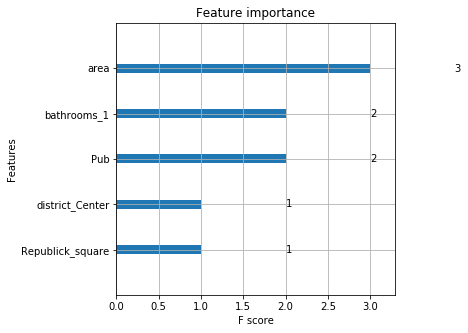

In [196]:
xgb.plot_importance(model_xgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [199]:
regressor=xgb.XGBRegressor()

In [1039]:
n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
booster=["gbtree","gblinear"]
learning_rate=[0.05,0.1,0.15,0.2]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

In [1040]:
hyperparameter_grid={
    "n_estimators" : n_estimators,
    "max_depth" : max_depth,
    "learning_rate" : learning_rate,
    "min_child_weight" : min_child_weight,
    "booster" : booster,
    "base_score":base_score
}

In [1043]:
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=regressor,
                            param_distributions=hyperparameter_grid,
                            cv=5,n_iter=50,
                            n_jobs=4,
                            verbose=5,
                            return_train_score=True,
                            random_state=42)

In [1044]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 210.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 232.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 262.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                          verbosity=None),
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1

In [1046]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### XGBoostRegressor Best hyperparameters by Randomazied CrossValidation

In [107]:
X=data_final.drop("price",axis=1)
Y=data_final.price
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
regressor=xgb.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=4,  monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [108]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [254]:
filename = 'XGBoost_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model_XGBoost_model = pickle.load(open(filename, 'rb'))

In [416]:
y_pred=regressor.predict(x_train)

In [1361]:
y_pred_price=np.exp(y_pred)
y_test_price=np.exp(y_test)

In [1362]:
r2_score(y_test_price,y_pred_price)

0.9115177566290429

In [1363]:
evaluation(y_test_price,y_pred_price)

30115.935387763333

In [419]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))

In [420]:
rmse

0.01515634162168369

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=0)
Training score:  0.9830011646942888
Mean cross-validation score: 0.89
K-fold CV average score: 0.89
RMSE: 0.18


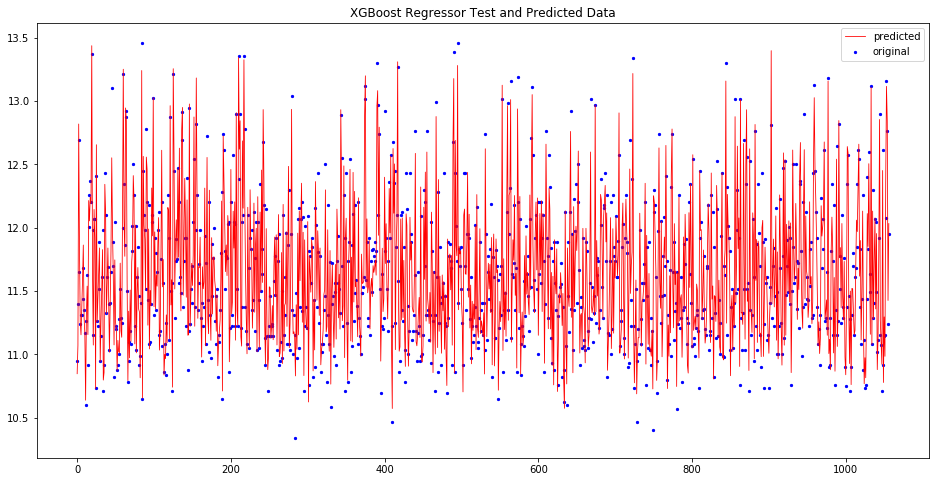

In [1355]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
 


xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

xgbr.fit(x_train, y_train)
 
score = xgbr.score(x_train, y_train)   
print("Training score: ", score) 
 
# - cross validataion 
scores = cross_val_score(xgbr, x_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
 
y_pred = xgbr.predict(x_test)
#mse = mean_squared_error(y_test, y_pred)
#print("MSE: %.2f" % mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.2f" % (rmse))#*(1/2.0)))

x_ax = range(len(y_test))
plt.figure(figsize=(16,8))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.title('XGBoost Regressor Test and Predicted Data')
plt.show()


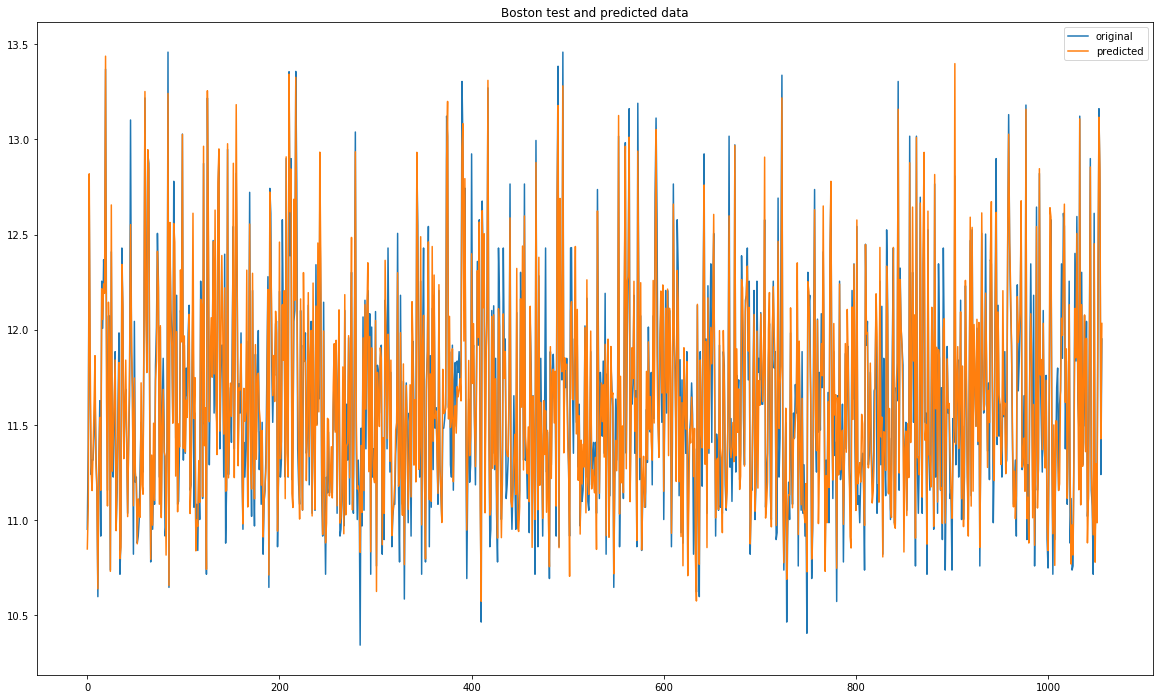

In [220]:
plt.figure(figsize=(20,12))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

# Neural Network

In [107]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

In [108]:
import tensorflow as tf

In [194]:
def train_validate_test_split(df, train_part=.6, validate_part=.2, test_part=.2, seed=None):
    np.random.seed(seed)
    total_size = train_part + validate_part + test_part
    train_percent = train_part / total_size
    validate_percent = validate_part / total_size
    test_percent = test_part / total_size
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = perm[:train_end]
    validate = perm[train_end:validate_end]
    test = perm[validate_end:]
    return train, validate, test

In [436]:
train_size, valid_size, test_size = (80, 20, 0)
kc_train, kc_valid, kc_test = train_validate_test_split(data_final, 
                              train_part=train_size, 
                              validate_part=valid_size,
                              test_part=test_size,
                              seed=2017)

In [437]:
kc_y_train = data_final.loc[kc_train, ["price"]]
kc_x_train = data_final.loc[kc_train, :].drop("price", axis=1)
kc_y_valid = data_final.loc[kc_valid, ["price"]]
kc_x_valid = data_final.loc[kc_valid, :].drop("price", axis=1)

print('Size of training set: ', len(kc_x_train))
print('Size of validation set: ', len(kc_x_valid))
print('Size of test set: ', len(kc_test), '(not converted)')

Size of training set:  4228
Size of validation set:  1057
Size of test set:  0 (not converted)


In [438]:
def norm_stats(df1, df2):
    dfs = df1.append(df2)
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)

In [439]:
def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [440]:
stats = norm_stats(kc_x_train, kc_x_valid)
arr_x_train = np.array(z_score(kc_x_train, stats))
arr_y_train = np.array(kc_y_train)
arr_x_valid = np.array(z_score(kc_x_valid, stats))
arr_y_valid = np.array(kc_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (4228, 167)
Training samples:  4228
Validation samples:  1057


In [441]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [442]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

In [521]:
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(50, activation="relu",
        kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
    t_model.add(Dense(10, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[rmse])
    return(t_model)

In [522]:
rmse=tf.keras.metrics.RootMeanSquaredError()

In [529]:
def basic_model_3(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(120, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(30, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
    t_model.add(Dropout(0.0))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer='nadam',
        metrics=[rmse])#tf.keras.metrics.RootMeanSquaredError()
    return(t_model)

In [530]:
model_NN = basic_model_3(arr_x_train.shape[1], arr_y_train.shape[1])
model_NN.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 80)                13440     
_________________________________________________________________
dropout_110 (Dropout)        (None, 80)                0         
_________________________________________________________________
dense_166 (Dense)            (None, 120)               9720      
_________________________________________________________________
dropout_111 (Dropout)        (None, 120)               0         
_________________________________________________________________
dense_167 (Dense)            (None, 30)                3630      
_________________________________________________________________
dropout_112 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_168 (Dense)            (None, 10)              

In [531]:
epochs = 500
batch_size = 128

print('Epochs: ', epochs)
print('Batch size: ', batch_size)

Epochs:  500
Batch size:  128


In [532]:
keras_callbacks = [
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2)
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0)
    # TensorBoard(log_dir='/tmp/keras_logs/model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
    EarlyStopping(monitor='val_root_mean_squared_error', patience=30, verbose=0)
]

In [533]:
history = model_NN.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2, # Change it to 2, if wished to observe execution
    validation_data=(arr_x_valid, arr_y_valid))

Epoch 1/500
34/34 - 0s - loss: 117.1165 - root_mean_squared_error: 9.4723 - val_loss: 33.6152 - val_root_mean_squared_error: 5.2884
Epoch 2/500
34/34 - 0s - loss: 17.4466 - root_mean_squared_error: 3.4209 - val_loss: 11.7365 - val_root_mean_squared_error: 2.4945
Epoch 3/500
34/34 - 0s - loss: 9.9885 - root_mean_squared_error: 2.1511 - val_loss: 7.8739 - val_root_mean_squared_error: 1.6471
Epoch 4/500
34/34 - 0s - loss: 8.2058 - root_mean_squared_error: 1.8023 - val_loss: 9.8806 - val_root_mean_squared_error: 2.2688
Epoch 5/500
34/34 - 0s - loss: 7.4654 - root_mean_squared_error: 1.6925 - val_loss: 5.9054 - val_root_mean_squared_error: 1.2096
Epoch 6/500
34/34 - 0s - loss: 6.6423 - root_mean_squared_error: 1.5378 - val_loss: 5.5877 - val_root_mean_squared_error: 1.1993
Epoch 7/500
34/34 - 0s - loss: 6.2392 - root_mean_squared_error: 1.4980 - val_loss: 4.9198 - val_root_mean_squared_error: 1.0232
Epoch 8/500
34/34 - 0s - loss: 5.7892 - root_mean_squared_error: 1.4325 - val_loss: 4.6566 -

34/34 - 0s - loss: 1.2250 - root_mean_squared_error: 0.8150 - val_loss: 0.6798 - val_root_mean_squared_error: 0.3661
Epoch 65/500
34/34 - 0s - loss: 1.1845 - root_mean_squared_error: 0.8101 - val_loss: 1.2754 - val_root_mean_squared_error: 0.8217
Epoch 66/500
34/34 - 0s - loss: 1.2121 - root_mean_squared_error: 0.8244 - val_loss: 0.8599 - val_root_mean_squared_error: 0.5520
Epoch 67/500
34/34 - 0s - loss: 1.1762 - root_mean_squared_error: 0.8167 - val_loss: 0.8448 - val_root_mean_squared_error: 0.5576
Epoch 68/500
34/34 - 0s - loss: 1.1333 - root_mean_squared_error: 0.7993 - val_loss: 0.6259 - val_root_mean_squared_error: 0.3725
Epoch 69/500
34/34 - 0s - loss: 1.1237 - root_mean_squared_error: 0.8061 - val_loss: 0.6125 - val_root_mean_squared_error: 0.3294
Epoch 70/500
34/34 - 0s - loss: 1.0868 - root_mean_squared_error: 0.7865 - val_loss: 0.8024 - val_root_mean_squared_error: 0.5560
Epoch 71/500
34/34 - 0s - loss: 1.1029 - root_mean_squared_error: 0.8087 - val_loss: 0.7244 - val_root_

Epoch 127/500
34/34 - 0s - loss: 0.4899 - root_mean_squared_error: 0.5844 - val_loss: 0.2063 - val_root_mean_squared_error: 0.2432
Epoch 128/500
34/34 - 0s - loss: 0.4866 - root_mean_squared_error: 0.5825 - val_loss: 0.2065 - val_root_mean_squared_error: 0.2469
Epoch 129/500
34/34 - 0s - loss: 0.4765 - root_mean_squared_error: 0.5759 - val_loss: 0.2001 - val_root_mean_squared_error: 0.2349
Epoch 130/500
34/34 - 0s - loss: 0.4668 - root_mean_squared_error: 0.5681 - val_loss: 0.1955 - val_root_mean_squared_error: 0.2294
Epoch 131/500
34/34 - 0s - loss: 0.4633 - root_mean_squared_error: 0.5660 - val_loss: 0.2014 - val_root_mean_squared_error: 0.2480
Epoch 132/500
34/34 - 0s - loss: 0.4588 - root_mean_squared_error: 0.5646 - val_loss: 0.2277 - val_root_mean_squared_error: 0.2869
Epoch 133/500
34/34 - 0s - loss: 0.4579 - root_mean_squared_error: 0.5632 - val_loss: 0.2071 - val_root_mean_squared_error: 0.2535
Epoch 134/500
34/34 - 0s - loss: 0.4442 - root_mean_squared_error: 0.5527 - val_los

Epoch 190/500
34/34 - 0s - loss: 0.1837 - root_mean_squared_error: 0.3212 - val_loss: 0.1334 - val_root_mean_squared_error: 0.2268
Epoch 191/500
34/34 - 0s - loss: 0.1774 - root_mean_squared_error: 0.3121 - val_loss: 0.1460 - val_root_mean_squared_error: 0.2471
Epoch 192/500
34/34 - 0s - loss: 0.1764 - root_mean_squared_error: 0.3102 - val_loss: 0.1674 - val_root_mean_squared_error: 0.2887
Epoch 193/500
34/34 - 0s - loss: 0.1778 - root_mean_squared_error: 0.3154 - val_loss: 0.1447 - val_root_mean_squared_error: 0.2600
Epoch 194/500
34/34 - 0s - loss: 0.1742 - root_mean_squared_error: 0.3105 - val_loss: 0.1266 - val_root_mean_squared_error: 0.2229
Epoch 195/500
34/34 - 0s - loss: 0.1700 - root_mean_squared_error: 0.3050 - val_loss: 0.1594 - val_root_mean_squared_error: 0.2911
Epoch 196/500
34/34 - 0s - loss: 0.1660 - root_mean_squared_error: 0.2993 - val_loss: 0.1473 - val_root_mean_squared_error: 0.2713
Epoch 197/500
34/34 - 0s - loss: 0.1606 - root_mean_squared_error: 0.2922 - val_los

Epoch 253/500
34/34 - 0s - loss: 0.1115 - root_mean_squared_error: 0.2312 - val_loss: 0.1082 - val_root_mean_squared_error: 0.2258
Epoch 254/500
34/34 - 0s - loss: 0.1136 - root_mean_squared_error: 0.2354 - val_loss: 0.1065 - val_root_mean_squared_error: 0.2188
Epoch 255/500
34/34 - 0s - loss: 0.1102 - root_mean_squared_error: 0.2277 - val_loss: 0.1108 - val_root_mean_squared_error: 0.2309
Epoch 256/500
34/34 - 0s - loss: 0.1107 - root_mean_squared_error: 0.2295 - val_loss: 0.1153 - val_root_mean_squared_error: 0.2324
Epoch 257/500
34/34 - 0s - loss: 0.1132 - root_mean_squared_error: 0.2335 - val_loss: 0.1168 - val_root_mean_squared_error: 0.2437
Epoch 258/500
34/34 - 0s - loss: 0.1119 - root_mean_squared_error: 0.2316 - val_loss: 0.1111 - val_root_mean_squared_error: 0.2220
Epoch 259/500
34/34 - 0s - loss: 0.1159 - root_mean_squared_error: 0.2364 - val_loss: 0.1438 - val_root_mean_squared_error: 0.2969
Epoch 260/500
34/34 - 0s - loss: 0.1128 - root_mean_squared_error: 0.2338 - val_los

Epoch 316/500
34/34 - 0s - loss: 0.0999 - root_mean_squared_error: 0.2197 - val_loss: 0.1132 - val_root_mean_squared_error: 0.2398
Epoch 317/500
34/34 - 0s - loss: 0.1030 - root_mean_squared_error: 0.2246 - val_loss: 0.0985 - val_root_mean_squared_error: 0.2136
Epoch 318/500
34/34 - 0s - loss: 0.1008 - root_mean_squared_error: 0.2222 - val_loss: 0.1040 - val_root_mean_squared_error: 0.2293
Epoch 319/500
34/34 - 0s - loss: 0.1016 - root_mean_squared_error: 0.2242 - val_loss: 0.1022 - val_root_mean_squared_error: 0.2290
Epoch 320/500
34/34 - 0s - loss: 0.1005 - root_mean_squared_error: 0.2220 - val_loss: 0.0959 - val_root_mean_squared_error: 0.2090
Epoch 321/500
34/34 - 0s - loss: 0.1020 - root_mean_squared_error: 0.2232 - val_loss: 0.1385 - val_root_mean_squared_error: 0.2986
Epoch 322/500
34/34 - 0s - loss: 0.1034 - root_mean_squared_error: 0.2269 - val_loss: 0.1091 - val_root_mean_squared_error: 0.2366
Epoch 323/500
34/34 - 0s - loss: 0.1000 - root_mean_squared_error: 0.2207 - val_los

Epoch 379/500
34/34 - 0s - loss: 0.0924 - root_mean_squared_error: 0.2160 - val_loss: 0.0925 - val_root_mean_squared_error: 0.2188
Epoch 380/500
34/34 - 0s - loss: 0.0917 - root_mean_squared_error: 0.2154 - val_loss: 0.0906 - val_root_mean_squared_error: 0.2143
Epoch 381/500
34/34 - 0s - loss: 0.0903 - root_mean_squared_error: 0.2120 - val_loss: 0.0985 - val_root_mean_squared_error: 0.2290
Epoch 382/500
34/34 - 0s - loss: 0.0916 - root_mean_squared_error: 0.2145 - val_loss: 0.0964 - val_root_mean_squared_error: 0.2275
Epoch 383/500
34/34 - 0s - loss: 0.0923 - root_mean_squared_error: 0.2168 - val_loss: 0.0935 - val_root_mean_squared_error: 0.2184
Epoch 384/500
34/34 - 0s - loss: 0.0906 - root_mean_squared_error: 0.2127 - val_loss: 0.0913 - val_root_mean_squared_error: 0.2151
Epoch 385/500
34/34 - 0s - loss: 0.0904 - root_mean_squared_error: 0.2124 - val_loss: 0.0914 - val_root_mean_squared_error: 0.2172
Epoch 386/500
34/34 - 0s - loss: 0.0887 - root_mean_squared_error: 0.2098 - val_los

Epoch 442/500
34/34 - 0s - loss: 0.0831 - root_mean_squared_error: 0.2040 - val_loss: 0.0985 - val_root_mean_squared_error: 0.2397
Epoch 443/500
34/34 - 0s - loss: 0.0834 - root_mean_squared_error: 0.2054 - val_loss: 0.0932 - val_root_mean_squared_error: 0.2269
Epoch 444/500
34/34 - 0s - loss: 0.0827 - root_mean_squared_error: 0.2035 - val_loss: 0.0951 - val_root_mean_squared_error: 0.2342
Epoch 445/500
34/34 - 0s - loss: 0.0867 - root_mean_squared_error: 0.2129 - val_loss: 0.0924 - val_root_mean_squared_error: 0.2245
Epoch 446/500
34/34 - 0s - loss: 0.0837 - root_mean_squared_error: 0.2067 - val_loss: 0.1048 - val_root_mean_squared_error: 0.2486
Epoch 447/500
34/34 - 0s - loss: 0.0817 - root_mean_squared_error: 0.2025 - val_loss: 0.0893 - val_root_mean_squared_error: 0.2239
Epoch 448/500
34/34 - 0s - loss: 0.0826 - root_mean_squared_error: 0.2044 - val_loss: 0.0988 - val_root_mean_squared_error: 0.2390
Epoch 449/500
34/34 - 0s - loss: 0.0840 - root_mean_squared_error: 0.2072 - val_los

In [534]:
train_score = model_NN.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model_NN.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train RMSE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val RMSE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train RMSE:  0.1528 , Train Loss:  0.0619
Val RMSE:  0.2206 , Val Loss:  0.0872


In [471]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h["root_mean_squared_error"])
    plt.plot(h['val_root_mean_squared_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

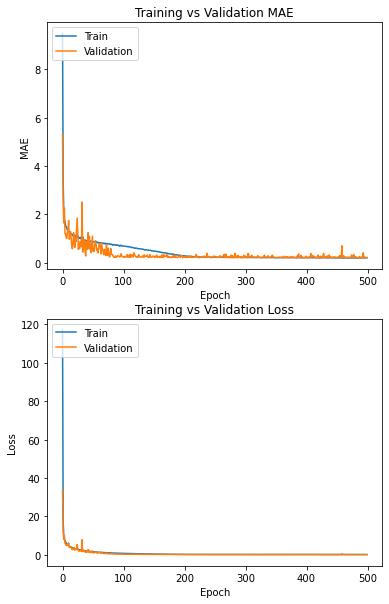

In [535]:
plot_hist(history.history)

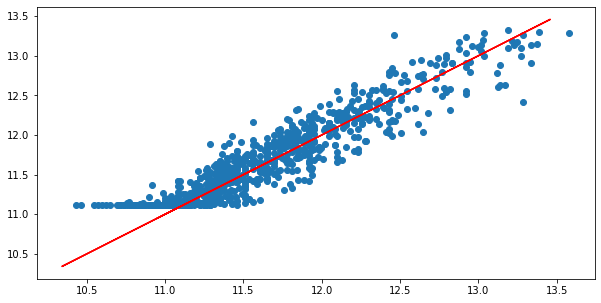

In [407]:
# Visualizing Our predictions
y_pred = model_NN.predict(arr_x_valid)
fig = plt.figure(figsize=(10,5))

plt.scatter(arr_y_valid,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

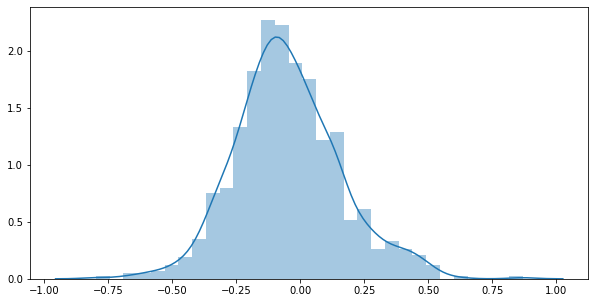

In [408]:
#visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (arr_y_valid- y_pred)
sns.distplot(residuals)

In [410]:
filename = 'NN_model_02.sav'
pickle.dump(model_NN, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model_NN_01 = pickle.load(open(filename, 'rb'))

TypeError: cannot pickle '_thread.RLock' object

In [1345]:
train_score = loaded_model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = loaded_model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  0.1269 , Train Loss:  0.0792
Val MAE:  0.1823 , Val Loss:  0.1055


### Predict Your House Price

In [109]:
all_dummies = data_dummies.columns.tolist()

In [185]:
for_try = data.iloc[:1,:].copy()

In [190]:
for_try.reset_index(drop=False,inplace=True)

In [197]:
data.street.unique()

array(['Baghramyan', 'Northern_Hyusisayin', 'Komitas', 'Amiryan',
       'Nalbandyan', 'Abovyan', 'Davtashen_district', 'Sayat',
       'Moskovyan', 'Kajaznuni', 'Saryan', 'Mashtots', 'Davtashen',
       'Sasna', 'Mamikoniants', 'Aram', 'Tumanyan', 'Vardanants',
       'Other_Center', 'Other_Arabkir', 'A_Avetisyan',
       'Tsitsernakaberd_Highway', 'Pushkin', 'Antarayin', 'Charents',
       'Tigran', 'Other_Qanaqer', 'Hanrapetutyan', 'Other_Erebuni',
       'Adonts', 'A_Khachatrian', 'Teryan', 'Koghbatsi', 'Arabkir',
       'V_Papazyan', 'Bashinjaxyan', 'Sundukyan', 'M_Khorenatsi',
       'Argishti', 'Hambardzumyan', 'Gyulbenkyan', 'Other_Malatia',
       'Other_Nor', 'Paronyan', 'Tsarav_Aghbyur', 'Buzand', 'N_Zaryan',
       'Vratsakan', 'Hovsep', 'Gyurjyan', 'Lvovyan', 'Margaryan',
       'Artsakh', 'NarDos', 'Leningradyan', 'Other_Avan',
       'Other_Achapnyak', 'Other_Shengavit', 'Aghbyur', 'Y_Kochar',
       'Hakobyan', 'Griboedov', 'Orbeli_Yeghbayrner', 'Lalayants',
       'Zak

In [199]:
data.height.unique()

array(['3.2 M', '3 M', '2.8 M', '2.6 M', '3.8 M'], dtype=object)

In [181]:
def predict_data(newpoint):
    data_numeric= newpoint.select_dtypes(include="number")
    for i in data_numeric.columns:
        data_numeric[i] = data_numeric[i].apply(np.log1p)
    data_object=newpoint.select_dtypes(exclude='number')
    
    data_dummies=pd.get_dummies(data_object,prefix=data_object.columns,drop_first=True)
    ###

    for dummy in all_dummies:
        if dummy not in data_dummies.columns.tolist():
            data_dummies[dummy] = 0
    data_final=data_numeric.join(data_dummies)
    data_final = data_final[x_train.columns.to_list()]
    
    pr=regressor.predict(data_final)
    print (f"The estimated price of the following house is $ {round(np.exp(pr)[0])} based on it's parameters")

In [182]:
#data_final_maqur.drop("price",axis=1,inplace=True)

In [183]:
import warnings
warnings.filterwarnings('ignore')

In [194]:
for_try['area']

0    114.0
Name: area, dtype: float64

In [200]:
for_try['area'] = 95
for_try['street'] = "Kievyan"
for_try['floor'] = 2
for_try['height'] = '3.2M'
for_try['rooms'] = "3"

In [201]:
predict_data(for_try)

The estimated price of the following house is $ 139163 based on it's parameters


In [ ]:
pd.get_dummies(pd.DataFrame({"street":"komitas"},index=[0]))

In [180]:
round(2.4654,3)

2.465

In [203]:
np.exp(0.024)

1.0242903178906215